# <center> Projet IA for HumanForYou<center>

#### Groupe 5 :
- Yanis MAAFI (PM)
- Floriane Carette 
- Antoine Sire
- Frederic Nguyen 

<h1 style="color:#4476d3">Définir le problème et les objectifs</h1>


<strong>HumanForYou</strong> est une entreprise de produits pharmaceutiques basée en Inde, qui emploie environ 4000 personnes. Cependant, chaque année, l'entreprise doit faire face à un taux de turn-over d'environ 15% de ses employés, ce qui nécessite de trouver des profils similaires sur le marché de l'emploi. La direction considère que ce niveau de turn-over a des conséquences négatives sur l'entreprise, car cela entraîne des retards dans les projets sur lesquels les employés quittant l'entreprise travaillaient, nuisant ainsi à la réputation de l'entreprise auprès de ses clients et partenaires. 

De plus, la gestion des ressources humaines devient plus complexe avec la nécessité de trouver des nouvelles recrues pour remplacer les anciennes. Enfin, le temps perdu à l'arrivée des nouveaux employés, qui doivent être formés et s'adapter à leur nouvel environnement, ralentit la productivité de l'entreprise.

Afin de remédier à ce problème, la direction de HumanForYou a fait appel à une équipe de spécialistes de l'analyse de données pour déterminer les facteurs ayant le plus d'influence sur le taux de turn-over. 
L'objectif est de proposer des modèles d'analyse pour identifier les pistes d'amélioration nécessaires pour inciter les employés à rester dans l'entreprise. 


 <h1 style="color:#4476d3">Livrable</h1>


Pour atteindre cet objectif, plusieurs étapes seront nécessaires, notamment la collecte de données pertinentes, le prétraitement de ces données pour s'assurer de leur qualité et de leur fiabilité, la création de modèles d'analyse prédictive pour identifier les facteurs ayant le plus d'influence sur le taux de turn-over, et la mise en place de mesures pour améliorer la rétention des employés. Ces mesures peuvent inclure des changements dans les politiques de ressources humaines, des améliorations des conditions de travail, ou des mesures incitatives pour les employés.

Les démarches qui seront suivis dans ce livrable sont:

- La génération du jeux de données en justifiant les choix et les traitements effectués pour faire face aux problématiques classiques de ce type de travail.

- Le choix de (des) l'algorithme(s) d'"IA" retenu(s).

- L'analyse des résultats obtenus et leur interprétation en s'appuyant sur des métriques.

- La démarche mise en œuvre pour améliorer un modèle.

- le choix du modèle retenu au final parmi les différents essais effectués en justifiant par rapport au besoin de votre client et des métriques.

- Des propositions finales justifiées

<h1 style="color:#4476d3">Préparation de l'environnement </h1>


Nous allons commencer par importer les packages nécessaires pour lire et explorer nos données. Les packages inclus sont les suivants :

   - <strong>Numpy</strong> :   Utilisé pour travailler avec des tableaux de différentes dimensions et effectuer des opérations mathématiques si nécessaire.
   - <strong>Pandas</strong> :  Utilisé pour travailler avec des cadres de données, ou "Dataframes".
   - <strong>Matplotlib</strong> : Utilisé pour afficher des données de manière graphique.
   - <strong>Hvplot</strong> :  Une bibliothèque graphique complémentaire à Matplotlib.
   - <strong>Seaborn</strong> : Utilisé pour créer des graphes statistiques en Python à partir des données fournies.
   - <strong>Sklearn</strong> : Utilisé pour effectuer des tâches de machine learning en Python, telles que la classification, la régression et le clustering.
   - <strong>Warnings</strong> : Cette bibliothèque nous permettra de filtrer les messages techniques affichés.
   

In [196]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer

# Ignorer les warnings
import warnings

warnings.filterwarnings('ignore')

<h1 style="color:#4476d3">Etape du projet </h1>

### Etape 1 - Collecte des données :

Nous entamons la première étape qui consiste à collecter des données pour entraîner notre modèle. L'entreprise <strong>HumanForYou</strong> nous a fourni cinq fichiers CSV contenant les informations dont nous avons besoin.

Dans ce projet, nous allons utiliser la bibliothèque Pandas pour lire les fichiers CSV directement et commencer à explorer les données. Cette étape est cruciale car elle nous permettra de comprendre la structure et la qualité de nos données.

Si vous souhaitez voir notre projet, nous avons mis en place un [repository Github](https://github.com/itsyanis/Machine-Learning-Project) où vous pouvez trouver le code source et les autres fichiers pertinents.

In [197]:
general_data = pd.read_csv("./Data/general_data.csv")
employee_survey_data = pd.read_csv('./Data/employee_survey_data.csv')
manager_survey_data = pd.read_csv('./Data/manager_survey_data.csv')

in_time_data = pd.read_csv('./Data/in_time.csv')
out_time_data = pd.read_csv('./Data/out_time.csv')

Dans un premier temps nous allons fusionner les trois premiers DataFrame qui sont : 
 - general_data
 - employee_survey_data
 - manager_survey_data

Les DataFrames <strong>"in_time_data"</strong> et <strong>"out_time_data"</strong> nécessitent une manipulation particulière avant d'etre fusionnés, nous veront ça juste apres.

Nous avons donc débuté notre processus de fusion en utilisant la fonction "merge()" de Pandas, qui nous permet de fusionner plusieurs DataFrames en utilisant la colonne <strong>EmployeeID </strong> comme clé de jointure.

In [198]:
employee_and_general_merged = employee_survey_data.merge(general_data, on='EmployeeID')
employee_and_manager_merged = employee_and_general_merged.merge(manager_survey_data, on='EmployeeID')

data_merged = employee_and_manager_merged.copy()
data_merged.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,11,8,0,1.0,6,1,0,0,3,3
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,23,8,1,6.0,3,5,1,4,2,4
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,15,8,3,5.0,2,5,0,3,3,3
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,11,8,3,13.0,5,8,7,5,2,3
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,12,8,2,9.0,2,6,0,4,3,3


Maintenant que nous avons fusionné les trois premiers DataFrames, il est temps d'examiner de plus près les DataFrames <strong>"in_time_data"</strong> et <strong>"out_time_data"</strong> et de voir comment les fusionner avec les autres.

In [5]:
in_time_data.head(1)

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44


In [6]:
out_time_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


Les jeux de données que nous avons à disposition contiennent les heures d'arrivée et de départ des employés pour tous les jours de l'année. 

Nous avons remarqué deux choses : 
 - La présence de valeurs indefinies "NaN"
 - Les données sont au format float64(12), int64(1) et object(249)

Dans cette partie de code, nous avons commencé par remplacer toutes les valeurs (NaN) par zéro dans ces DataFrames à l'aide de la méthode fillna() de pandas.

Nous avons ensuite créé une fonction que nous avons nommé <strong>"convert_to_datetime()"</strong> qui prend un DataFrame en entrée et convertit toutes les colonnes sauf la première (qui est supposée être l'ID de l'employé "EmployeeID) en format de date et heure (DateTime).

In [199]:
data_in_time = in_time_data.fillna(0)
data_out_time= out_time_data.fillna(0)

def convert_to_datetime(dataFrame):
    for date in dataFrame.columns[1:]:
        dataFrame[date] = pd.to_datetime(dataFrame[date])
    return dataFrame

data_in_time  = convert_to_datetime(data_in_time)
data_out_time = convert_to_datetime(data_out_time)
data_in_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: datetime64[ns](261), int64(1)
memory usage: 8.8 MB


Une fois que nous avons converti le type au format DateTime nous pouvant ainsi calculer le temps passé en entreprise pour chaque employé. 

Pour cela, nous avons créé un nouveau DataFrame appelé <strong>"working_time"</strong> en soustrayant les horaires d'entrée des horaires de sortie pour chaque employé 

Nous avons aussi supprimé une colonne inutile nommée "Unnamed: 0".

In [200]:
working_time = (data_out_time - data_in_time)
working_time = working_time.drop(columns=['Unnamed: 0'])
working_time.head()

,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,0 days,0 days 07:12:30,0 days 07:11:23,0 days 07:24:39,0 days 07:00:24,0 days 07:17:23,0 days 07:29:04,0 days 07:15:46,0 days 07:49:52,0 days,...,0 days 00:00:00,0 days 07:20:21,0 days 07:23:45,0 days 06:30:17,0 days 07:35:47,0 days,0 days 07:46:26,0 days 07:18:54,0 days 07:46:44,0 days 07:04:49
1,0 days,0 days 08:06:33,0 days 07:27:17,0 days 00:00:00,0 days 07:23:49,0 days 07:25:00,0 days 07:09:03,0 days 07:36:41,0 days 07:16:44,0 days,...,0 days 07:54:11,0 days 07:45:14,0 days 07:42:44,0 days 07:26:08,0 days 00:00:00,0 days,0 days 07:36:53,0 days 07:58:57,0 days 07:59:10,0 days 08:13:38
2,0 days,0 days 06:41:33,0 days 07:15:56,0 days 06:24:19,0 days 06:45:54,0 days 07:20:42,0 days 06:51:41,0 days 07:25:07,0 days 06:59:59,0 days,...,0 days 06:47:09,0 days 07:09:49,0 days 06:48:06,0 days 06:43:49,0 days 06:50:59,0 days,0 days 07:01:26,0 days 07:26:20,0 days 07:32:20,0 days 06:47:11
3,0 days,0 days 07:20:18,0 days 07:17:31,0 days 06:56:35,0 days 06:55:10,0 days 06:51:03,0 days 07:11:35,0 days 06:59:55,0 days 07:18:23,0 days,...,0 days 07:37:45,0 days 06:50:48,0 days 07:19:35,0 days 07:24:49,0 days 07:05:06,0 days,0 days 07:26:50,0 days 07:25:00,0 days 07:21:59,0 days 07:07:59
4,0 days,0 days 08:03:20,0 days 07:59:17,0 days 07:40:57,0 days 07:48:22,0 days 07:39:44,0 days 07:43:18,0 days 08:21:54,0 days 08:15:26,0 days,...,0 days 07:54:13,0 days 07:39:54,0 days 07:57:27,0 days 07:47:13,0 days 08:14:58,0 days,0 days 07:39:44,0 days 08:16:07,0 days 07:57:12,0 days 08:01:05


Dans le code ci-dessous, nous avons calculé la moyenne des temps de travail pour chaque employé en utilisant la méthode mean() de pandas.

In [201]:
working_time = working_time.mask(working_time == pd.Timedelta(0), pd.NaT)
working_time_mean = working_time.mean(axis=1)
working_time_mean.head()

0   0 days 07:22:25.142241379
1   0 days 07:43:08.288135593
2   0 days 07:00:47.665289256
3   0 days 07:11:37.242553191
4   0 days 08:00:22.228571428
dtype: timedelta64[ns]

<font color="green">Enfin, nous avons ajouté une nouvelle colonne que nous avons appellé <strong>"WorkingTime"</strong> à notre DataFrame <strong>data_merged</strong>, ainsi nous avons fusionner l'ensemble de nos données.</font>

In [125]:
data_merged['WorkingTime'] = working_time_mean.dt.total_seconds() / 3600
data_merged.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,WorkingTime
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,8,0,1.0,6,1,0,0,3,3,7.373651
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,8,1,6.0,3,5,1,4,2,4,7.718969
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,8,3,5.0,2,5,0,3,3,3,7.013240
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,8,3,13.0,5,8,7,5,2,3,7.193678
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,8,2,9.0,2,6,0,4,3,3,8.006175


<font color='green'><strong>Nous obtenons ainsi un DataFrame complet regroupant tous les fichiers CSV fournis par HumanForYou.</strong>
    
Maintenant, affichons le nombre de ligne et de colonne de notre DataFrame fusionné que nous avons nommé <strong>"data_merged"</strong></font>. 

In [8]:
data_merged.shape

(4410, 30)

<font color="red">Nous allons rechercher puis supprimer les données ne sont pas pertinentes :</font>

In [202]:
# Recherche puis suppression des colonne contenant des données non pertinante (càd: des colonnes ayant les meme valeurs pour toutes les ligne)
def drop_irrelevant_data(dataFrame):
    deleted_columns = []
    for column in dataFrame:
        if dataFrame[column].value_counts().shape[0] == 1:
            deleted_columns.append(column)
            dataFrame.drop(column, axis=1,inplace=True)
            print(column)

drop_irrelevant_data(data_merged)

EmployeeCount
Over18
StandardHours


### Etape 2 - Exploration et analyse des données :

Dans l'étape d'exploration et d'analyse des données, nous avons exploré et analysé les données afin de comprendre leur structure et leurs caractéristiques. 

Cette étape est cruciale car elle nous permet de comprendre les données avec lesquelles nous travaillons et de déterminer comment nous pouvons les utiliser pour résoudre notre problème de machine learning. 

Nous avons utilisé un histogramme pour afficher la distribution de la variable cible "Attrition", en séparant les employés qui ont quitté l'entreprise <strong>(yes)</strong> et ceux qui sont restés <strong>(no)</strong>. En affichant cette distribution, nous avons pu comprendre la proportion de cas d'attrition dans notre ensemble de données et si elle est équilibrée ou non. 

Cela peut nous aider à comprendre l'importance de cette variable dans notre modèle de prédiction et nous permettre de prendre des décisions plus éclairées lors de l'analyse des résultats de notre modèle.

<strong>Nous sommes curieux,</strong> et nous voulons avoir une idée générale de la proportion de turn-over dans notre jeu de données.

Nous avons donc créé donc un graphique à barres qui permet d'afficher la distribution de la variable "Attrition" dans notre jeu de données. Ce qui nous a permis de visualiser la répartition des employés ayant quitté l'entreprise parmi l'ensemble de notre population d'employés.

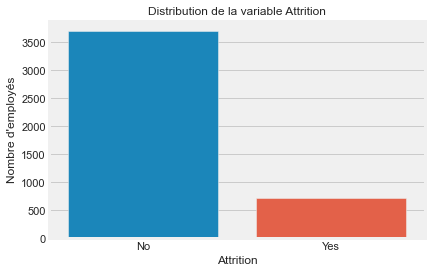

In [203]:
import seaborn as sns

sns.countplot(x='Attrition', data=data_merged)
sns.set(style='darkgrid')
plt.title('Distribution de la variable Attrition')
plt.xlabel('Attrition')
plt.ylabel('Nombre d\'employés')
plt.show()

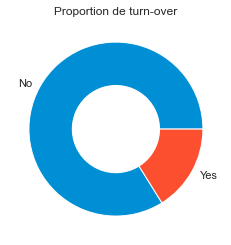

In [204]:
values = data_merged['Attrition'].value_counts().sort_index().values.tolist()

labels = ['No', 'Yes']
colors = ['#008fd5', '#fc4f30']
fig, ax = plt.subplots()
ax.pie(values, labels=labels, colors=colors)
centre_circle = plt.Circle((0,0),0.5,color='white', fc='white',linewidth=1.25)
fig.gca().add_artist(centre_circle)

plt.title("Proportion de turn-over")
plt.show()

#### 2.1- Analyse des variables quantitatives

Nous allons afficher des histogrammes pour chaque variable numérique dans notre ensemble de données. Cela nous permet de visualiser la distribution de chaque variable et d'identifier des schémas ou des tendances.

D'abord, nous affichons des histogrammes pour nos variables numériques. 

La suppression des colonnes non numériques est nécessaire car les histogrammes ne peuvent être tracés que pour les variables numériques. Cette suppression nous permet de se concentrer sur les variables numériques et de visualiser leur distribution à l'aide d'histogrammes.

Nous avons aussi supprimer la colonne <strong>EmployeeID</strong> qui est un identifiant unique pour chaque employé, nous nous assurons que cette variable non informative n'est pas incluse dans notre analyse.


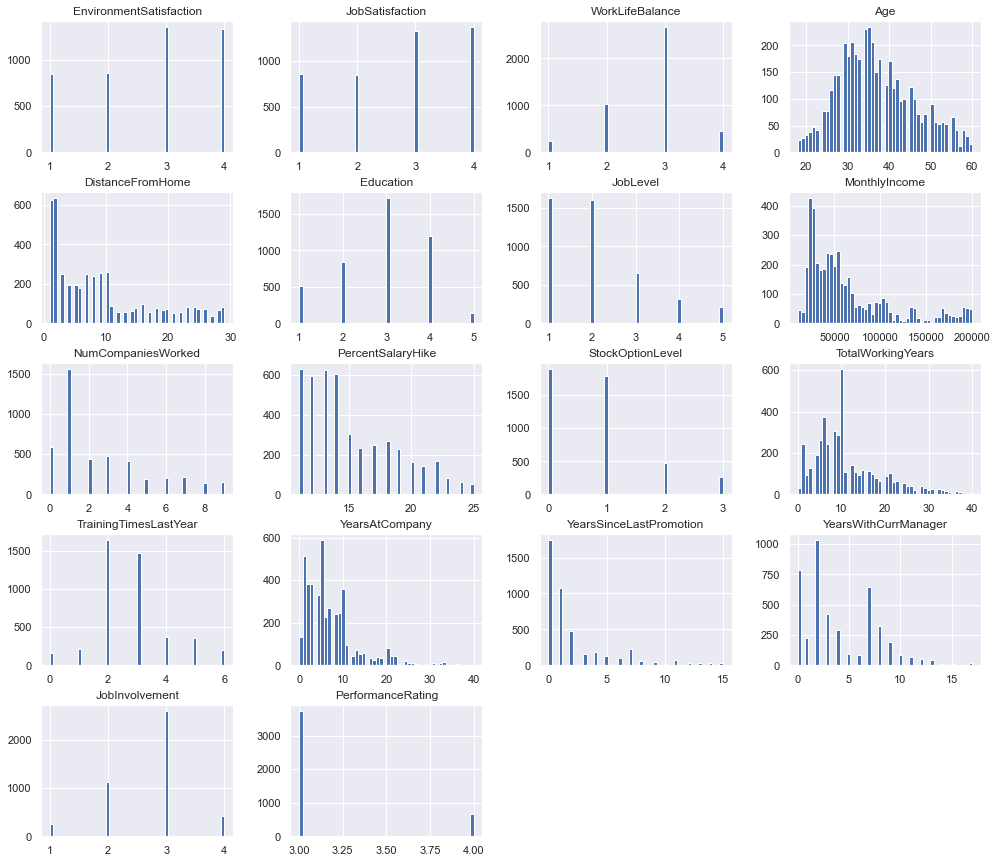

In [205]:
qualitative_columns = data_merged.select_dtypes(include='object').columns.tolist()  # Lister toutes les colonne non-numerique
data_copy = data_merged.copy()
data_copy.drop("EmployeeID", axis=1, inplace=True)          # (Momentanément pour l'analyse) suppression de EmployeeID
data_copy.drop(qualitative_columns, axis=1, inplace=True)   # (Momentanément pour l'analyse) suppression de toutes les colonnes qualitatives
data_copy.hist(bins=50, figsize=(15, 15))
plt.show()

Nous utilisons aussi le <strong>boxplot</strong> qui représente graphiquement la <strong>répartition des données en quartiles</strong>, et permet donc de visualiser la médiane, les quartiles et les valeurs aberrantes. 

Cette représentation est très utile pour comprendre la distribution des données et pour détecter des valeurs extrêmes qui peuvent avoir un impact important sur l'analyse statistique des données.

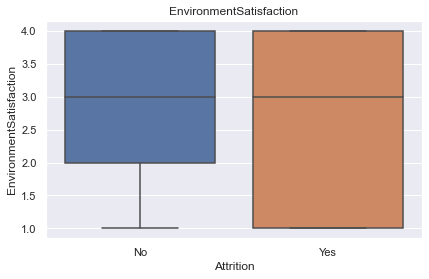

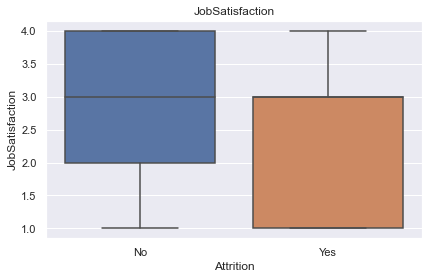

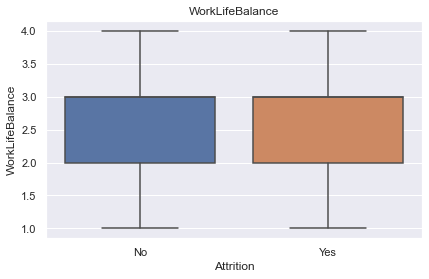

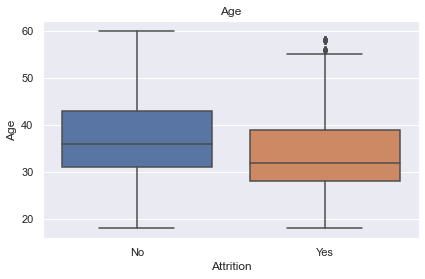

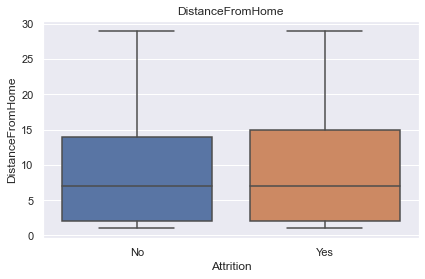

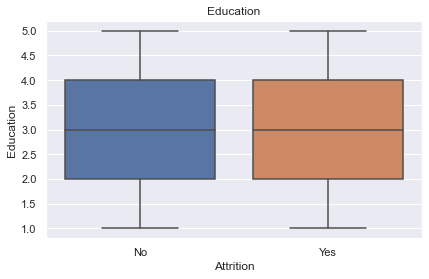

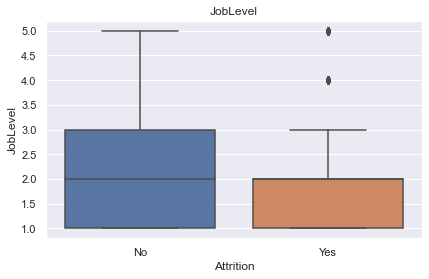

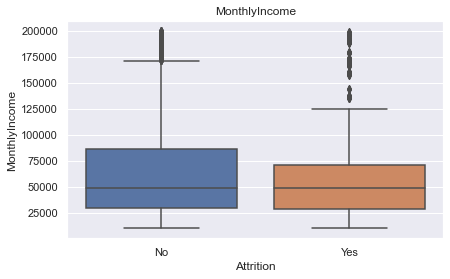

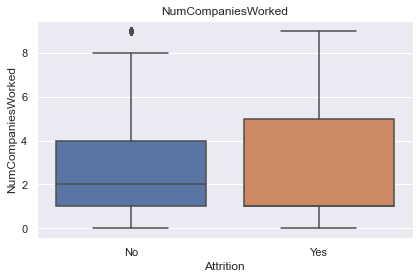

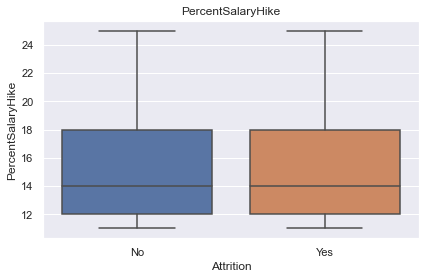

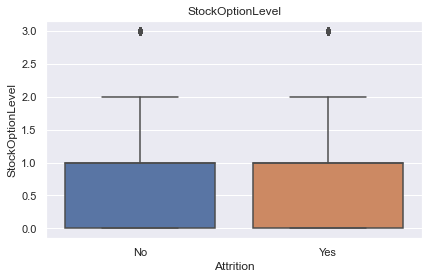

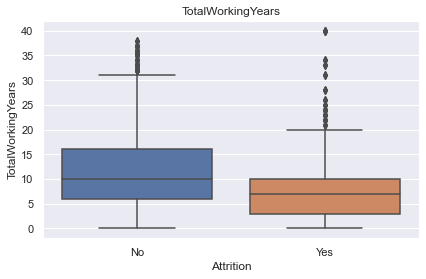

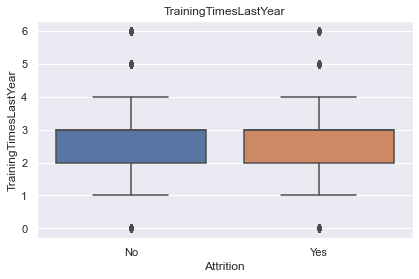

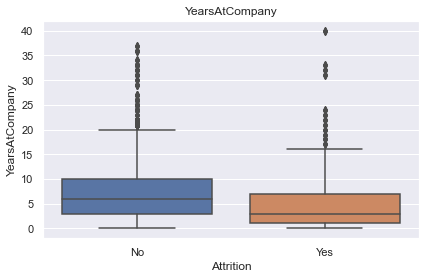

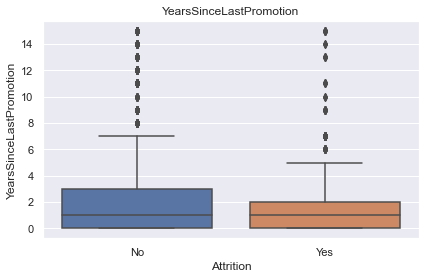

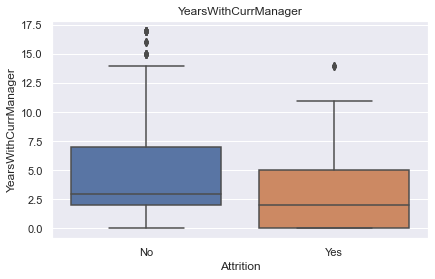

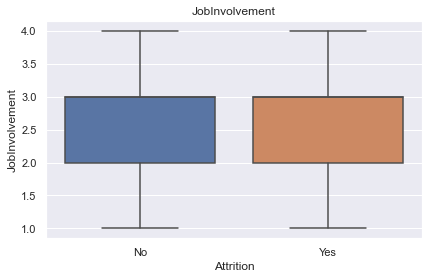

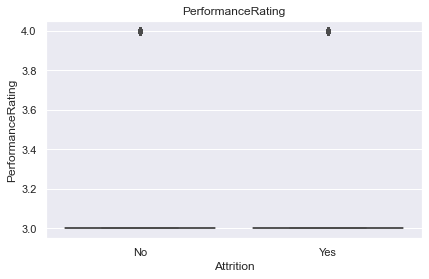

In [206]:
import seaborn as sns

for columns in data_merged.select_dtypes(np.number).columns:
    if columns == 'EmployeeID' or columns == 'Attrition':
        continue
    sns.boxplot(x='Attrition', y=columns, data=data_merged)
    plt.title(columns)
    plt.show()

#### 2.2- Analyse des variables qualitatives

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


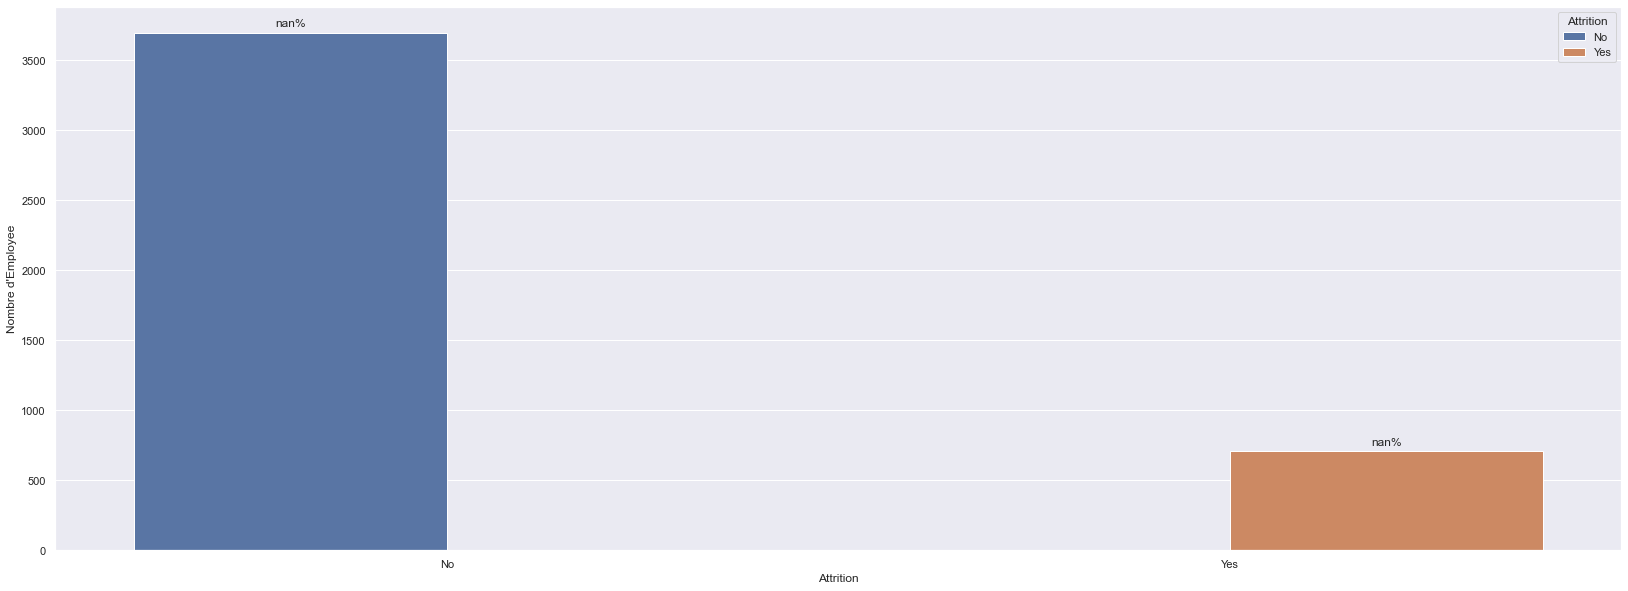

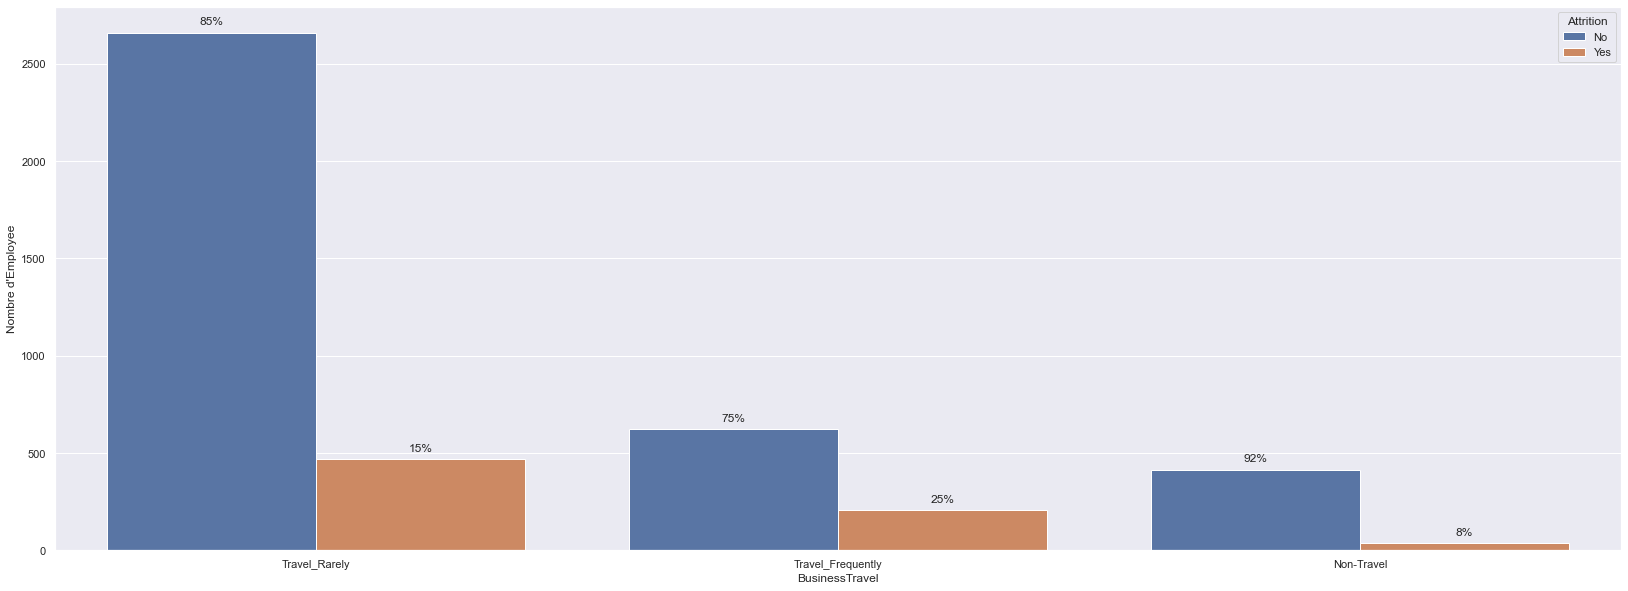

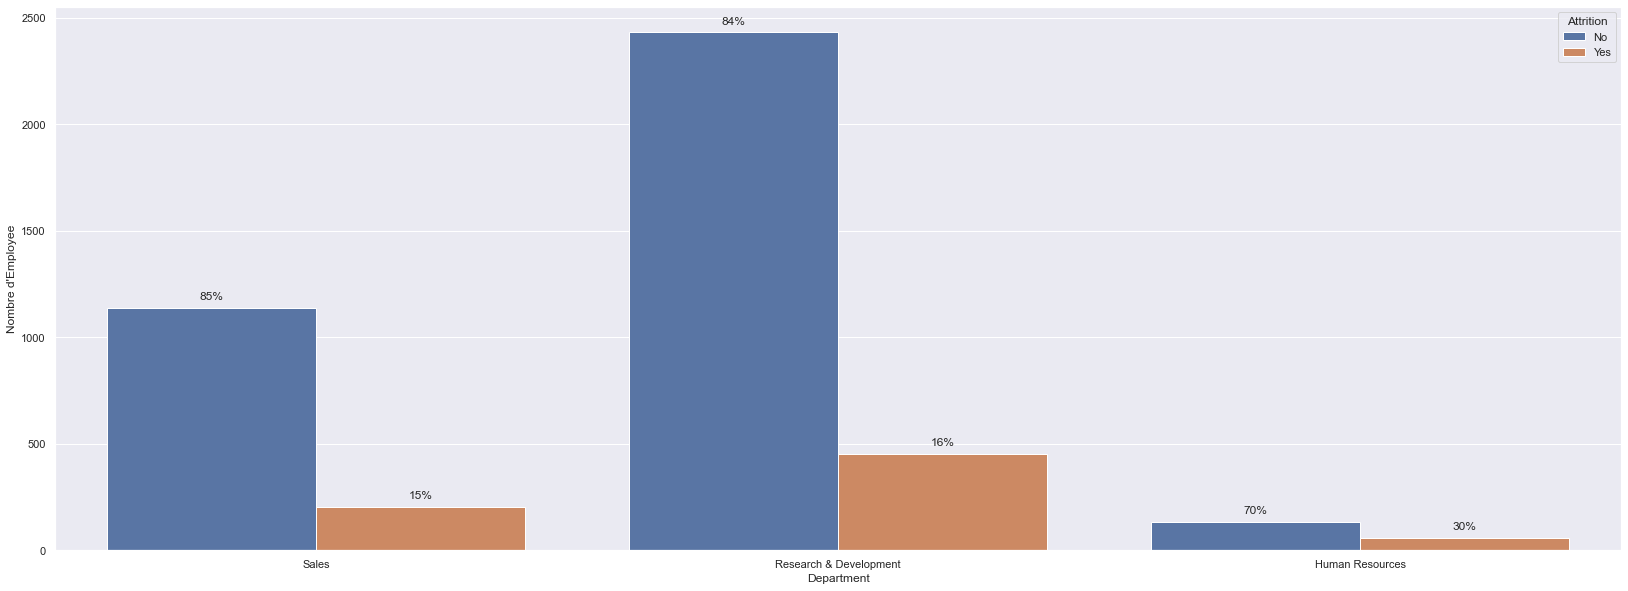

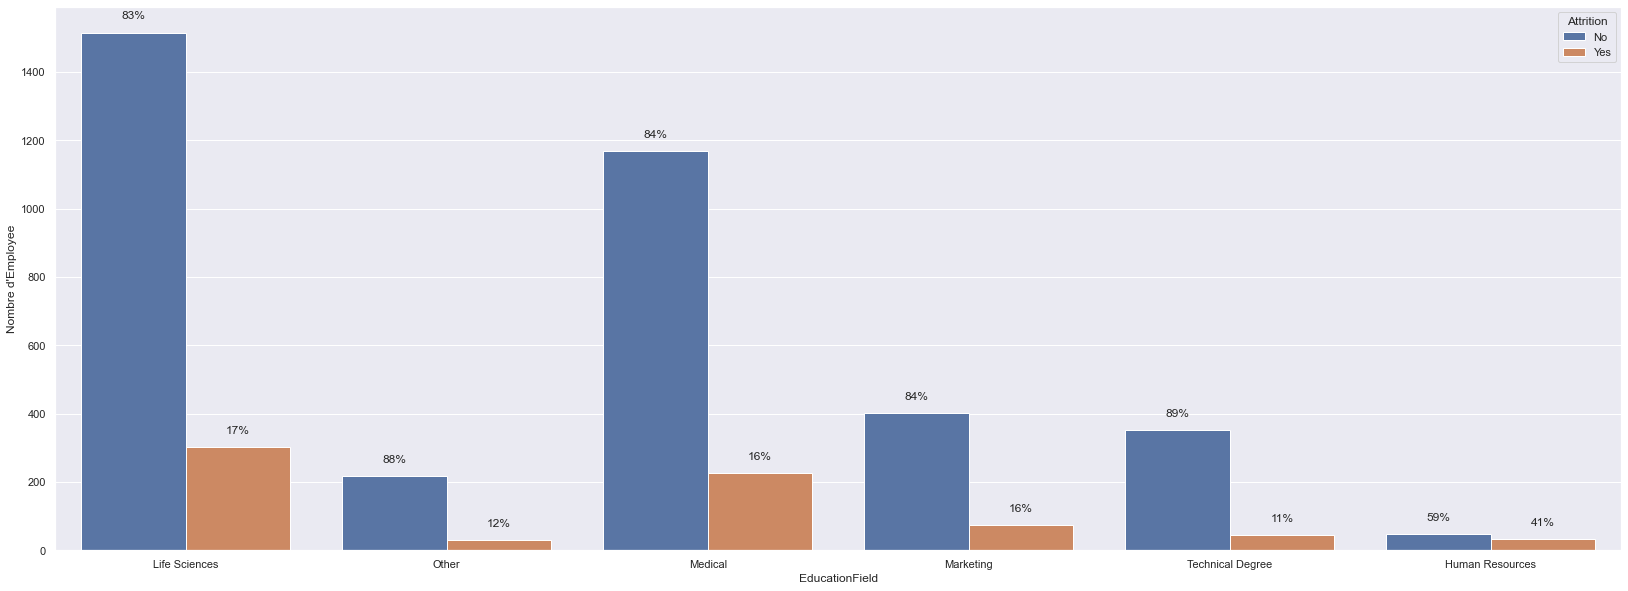

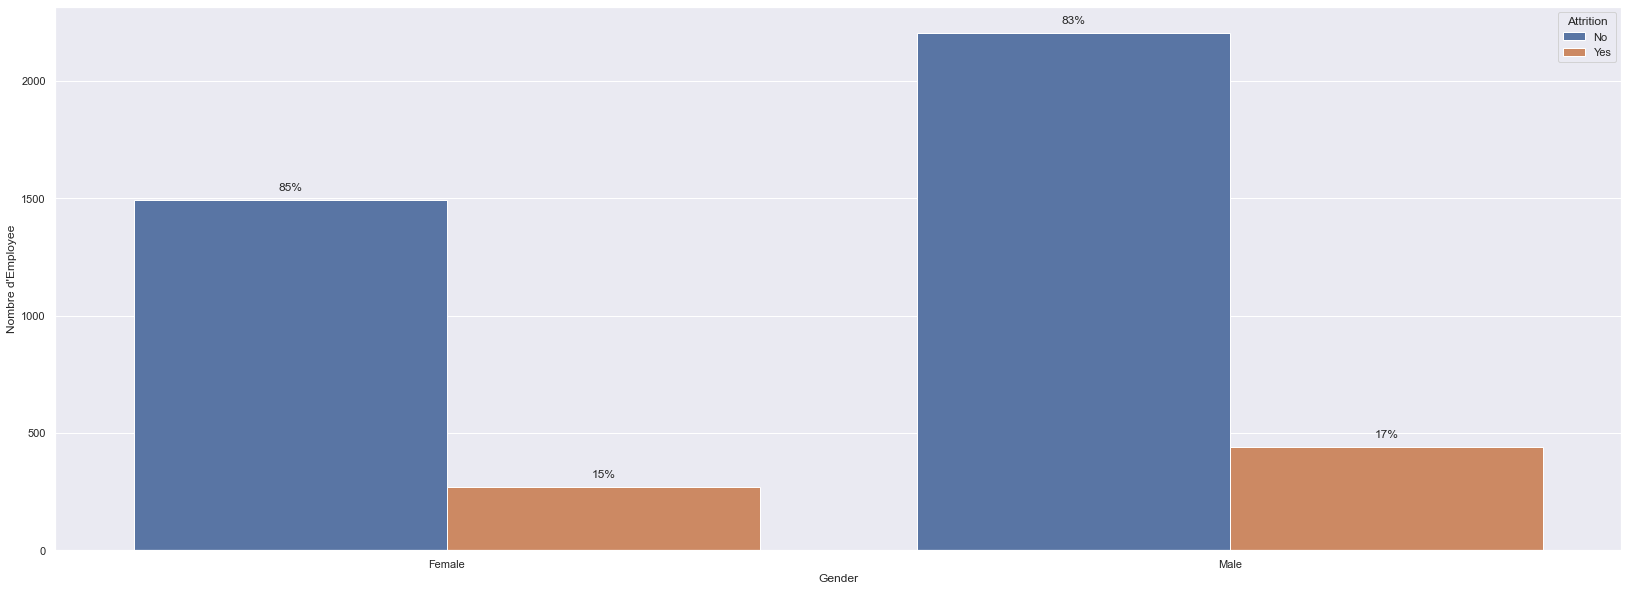

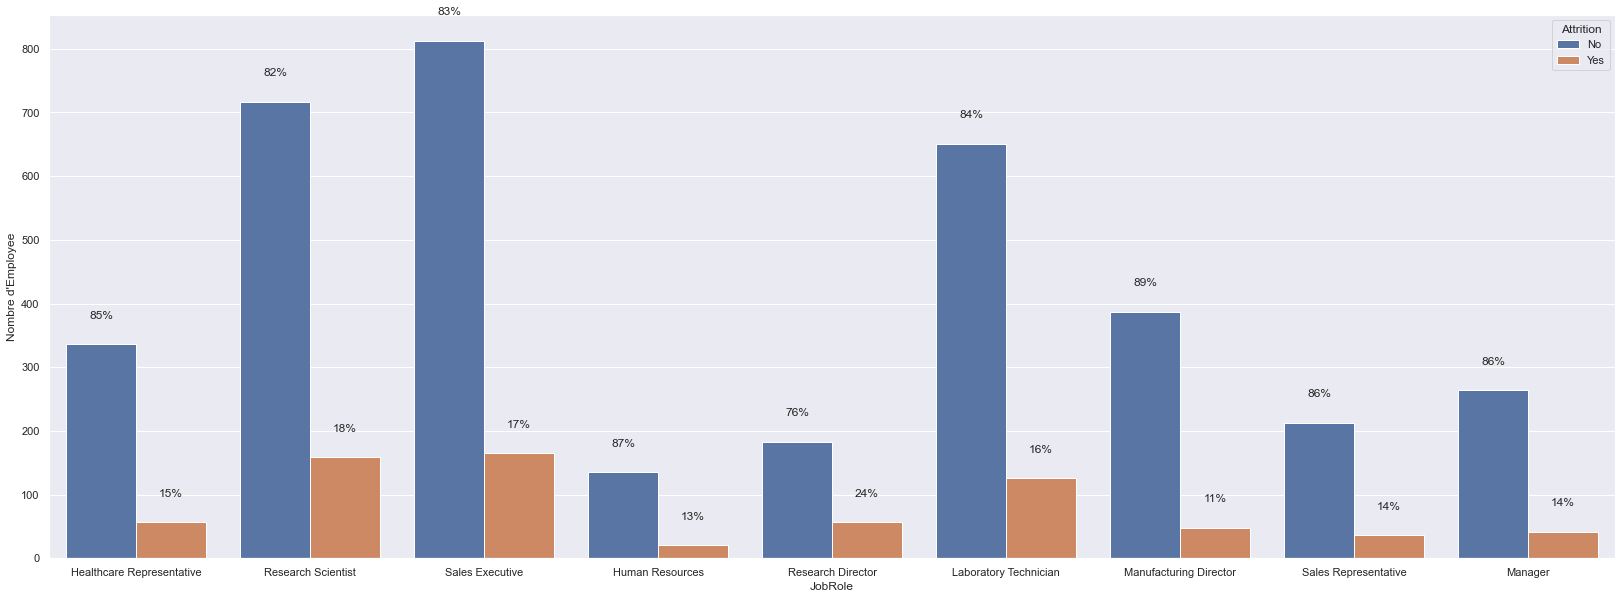

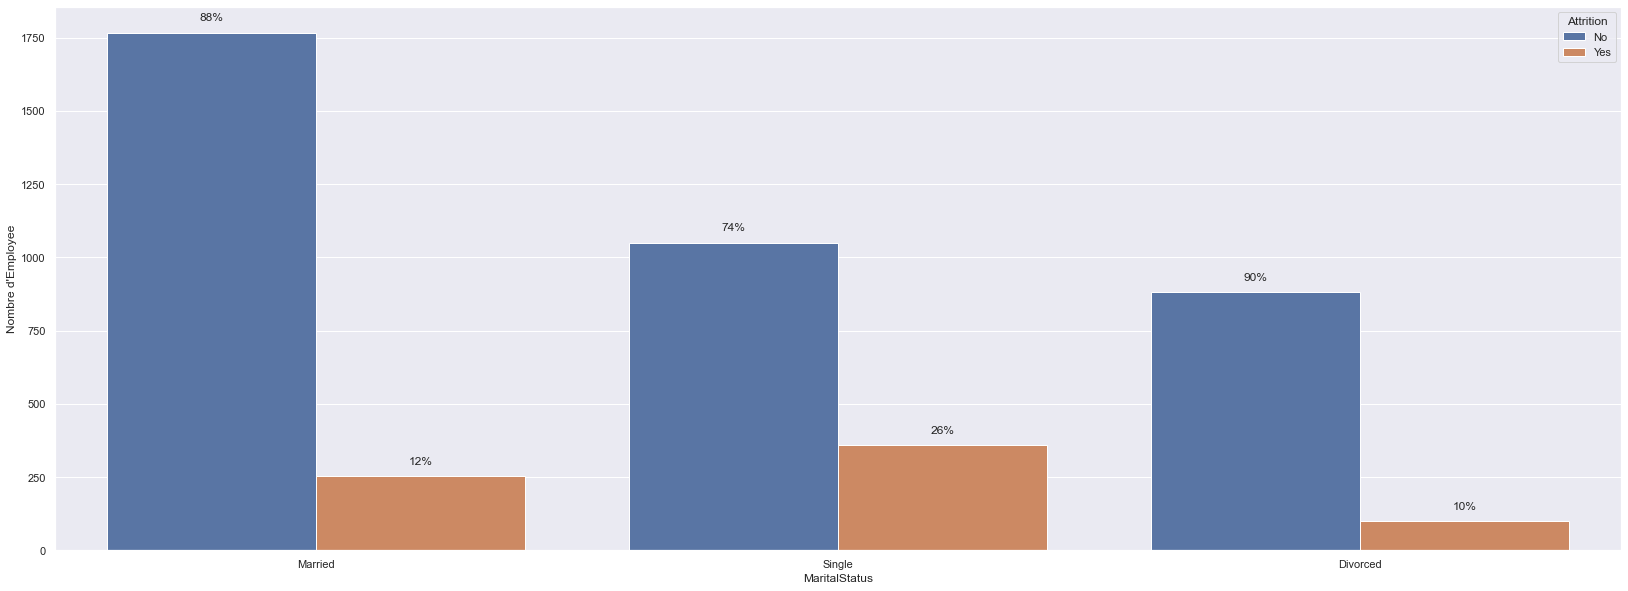

In [207]:
for columns in data_merged.select_dtypes(include='object').columns:
    plt.figure(figsize=(25,10))
    ax = sns.countplot(x=columns, data=data_merged, hue="Attrition")
    ax.set_ylabel('Nombre d\'Employee')
    bars = ax.patches
    half = int(len(bars)/2)
    left_bars = bars[:half]
    right_bars = bars[half:]

    for left, right in zip(left_bars, right_bars):
        height_l = left.get_height()
        height_r = right.get_height()
        total = height_l + height_r

        ax.text(left.get_x() + left.get_width()/2., height_l + 40, '{0:.0%}'.format(height_l/total), ha="center")
        ax.text(right.get_x() + right.get_width()/2., height_r + 40, '{0:.0%}'.format(height_r/total), ha="center")


### 3- Conclusion de l'analyse de données.

En analysant les graphiques, on peut émettre l'analyse qu'il semblerait que l'âge ainsi que le nombre d'années dans l'entreprise sont liés au départ des employées.


### 4- Tests de Khi2 et d'Anova

Les tests <strong>Anova</strong> et <strong>Khi2</strong> sont des tests statistiques couramment utilisés dans les analyses de données pour évaluer les différences entre les groupes de données et les associations entre les variables catégorielles, respectivement.

#### 4.1 Test de Khi2

Déterminer si deux variables catégorielles sont indépendantes ou non.

In [208]:
import scipy.stats as stats

for name_column in data_merged.select_dtypes(include=['object']).columns:
    if (name_column != "Attrition"):
        matrice = pd.crosstab(data_merged['Attrition'], data_merged[name_column])
        chi2, pvalue, dof, expected = stats.chi2_contingency(matrice)
        print(name_column, "=>  p_value : ", pvalue, "\033[32mDépendant\033[0m" if pvalue < 0.05 else "\033[31mIndépendant\033[0m")

BusinessTravel =>  p_value :  1.764276972983189e-16 Dépendant
Department =>  p_value :  4.820888218170406e-07 Dépendant
EducationField =>  p_value :  8.288917469574179e-09 Dépendant
Gender =>  p_value :  0.24529482862926827 Indépendant
JobRole =>  p_value :  0.001485544744815264 Dépendant
MaritalStatus =>  p_value :  8.45385940605786e-31 Dépendant


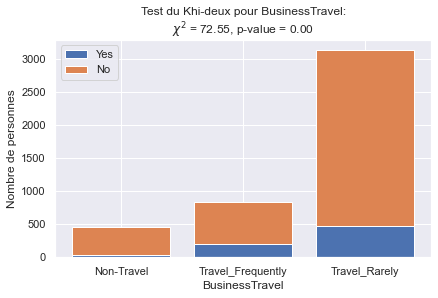

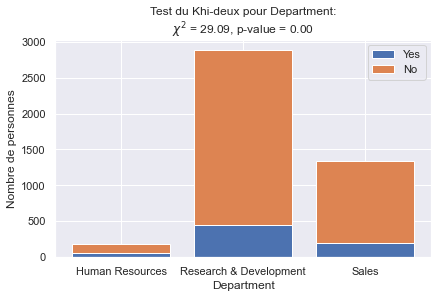

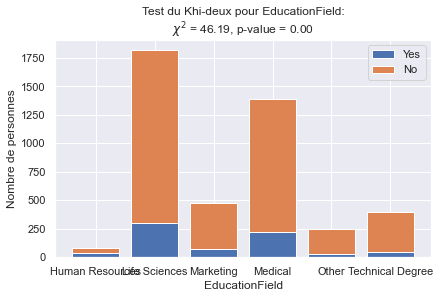

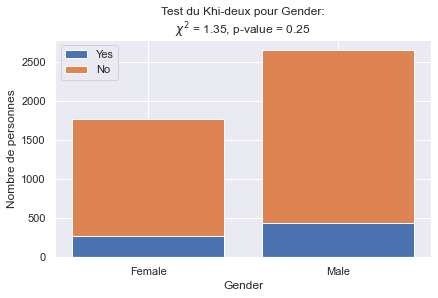

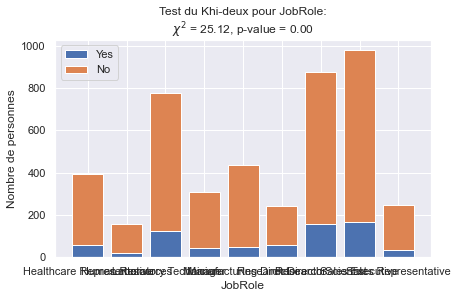

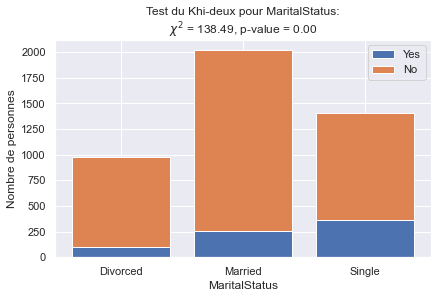

In [209]:
import matplotlib.pyplot as plt

for name_column in data_merged.select_dtypes(include=['object']).columns:
    if (name_column != "Attrition"):
        matrice = pd.crosstab(data_merged['Attrition'], data_merged[name_column])
        chi2, pvalue,dof, expected = stats.chi2_contingency(matrice)
        
        fig, ax = plt.subplots()
        ax.bar(matrice.columns, matrice.loc['Yes'], label='Yes')
        ax.bar(matrice.columns, matrice.loc['No'], bottom=matrice.loc['Yes'], label='No')
        ax.set_xlabel(name_column)
        ax.set_ylabel('Nombre de personnes')
        ax.legend()
        ax.set_title(f'Test du Khi-deux pour {name_column}:\n$\chi^2$ = {chi2:.2f}, p-value = {pvalue:.2f}')
        plt.show()


### 4.2 Test de Anova

Etudier la relation entre des variables numériques avec une variable cible

In [210]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

for name_column in data_merged.select_dtypes(include=np.number).columns:
    test_anova = name_column + ' ~ Attrition'
    model = ols(test_anova, data=data_merged).fit()
    result_anova = sm.stats.anova_lm(model, typ=2)
    print(name_column, "=> p_value : ", result_anova["PR(>F)"][0], "\033[32mDépendant\033[0m" if result_anova["PR(>F)"][0] < 0.05 else "\033[31mIndépendant\033[0m")

EmployeeID => p_value :  0.753548740189224 Indépendant
EnvironmentSatisfaction => p_value :  1.2054263294308051e-11 Dépendant
JobSatisfaction => p_value :  8.462258970635755e-12 Dépendant
WorkLifeBalance => p_value :  3.290290660322366e-05 Dépendant
Age => p_value :  1.9968016158845057e-26 Dépendant
DistanceFromHome => p_value :  0.5182860428065224 Indépendant
Education => p_value :  0.3157293177115451 Indépendant
JobLevel => p_value :  0.4945171727200731 Indépendant
MonthlyIncome => p_value :  0.038427484905971684 Dépendant
NumCompaniesWorked => p_value :  0.0050088441899783275 Dépendant
PercentSalaryHike => p_value :  0.030743386433316814 Dépendant
StockOptionLevel => p_value :  0.6498072937492487 Indépendant
TotalWorkingYears => p_value :  5.2412468106534875e-30 Dépendant
TrainingTimesLastYear => p_value :  0.0010247061915349563 Dépendant
YearsAtCompany => p_value :  3.16388312248436e-19 Dépendant
YearsSinceLastPromotion => p_value :  0.02833033618936241 Dépendant
YearsWithCurrManag

### Etape 3 - Prétraitement des données :

Maintenant que nous avons exploré et analysé nos données de manière générale, nous allons entamer la partie du prétraitement des données. 

Cette étape est cruciale dans tout projet de machine learning car elle permet de nettoyer, transformer et préparer les données pour l'étape suivante, à savoir la modélisation. Le but du prétraitement est de rendre les données prêtes à être utilisées pour la modélisation, en réduisant les erreurs et en éliminant les biais potentiels. 

Au cours de cette étape, nous allons traiter les données manquantes, les valeurs aberrantes et les doublons, normaliser les données et les encoder si nécessaire. Le prétraitement peut être un processus complexe et chronophage, mais il est essentiel pour garantir la qualité et la fiabilité des résultats de notre modèle de machine learning.

In [211]:
# Suppression du genre (Gender) car non-éthique 
data_merged.drop(["Gender"],axis=1,inplace=True)
# Suppression de EmployeeID car non-pertinent
data_merged.drop(["EmployeeID"],axis=1,inplace=True)
data_merged.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,...,1.0,11,0,1.0,6,1,0,0,3,3
1,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,...,0.0,23,1,6.0,3,5,1,4,2,4
2,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,Other,...,1.0,15,3,5.0,2,5,0,3,3,3
3,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,Life Sciences,...,3.0,11,3,13.0,5,8,7,5,2,3
4,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,Medical,...,4.0,12,2,9.0,2,6,0,4,3,3


In [212]:
qualitative_columns = data_merged.select_dtypes(include='object').columns.tolist()
print("Colonnes qualitatives : ", qualitative_columns)

Colonnes qualitatives :  ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']


In [213]:
import scipy.stats as stats

for name_column in data_merged.select_dtypes(include=['object']).columns:
    if (name_column != "Attrition"):
        matrice = pd.crosstab(data_merged['Attrition'], data_merged[name_column])
        chi2, pvalue, dof, expected = stats.chi2_contingency(matrice)
        print(name_column, "=>  p_value : ", pvalue, "\033[32mDépendant\033[0m" if pvalue < 0.05 else "\033[31mIndépendant\033[0m")

BusinessTravel =>  p_value :  1.764276972983189e-16 Dépendant
Department =>  p_value :  4.820888218170406e-07 Dépendant
EducationField =>  p_value :  8.288917469574179e-09 Dépendant
JobRole =>  p_value :  0.001485544744815264 Dépendant
MaritalStatus =>  p_value :  8.45385940605786e-31 Dépendant


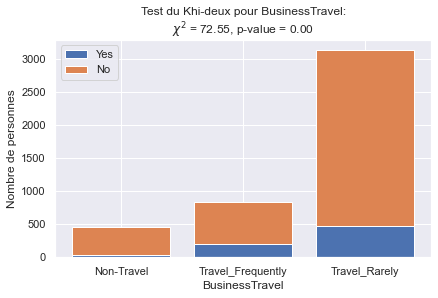

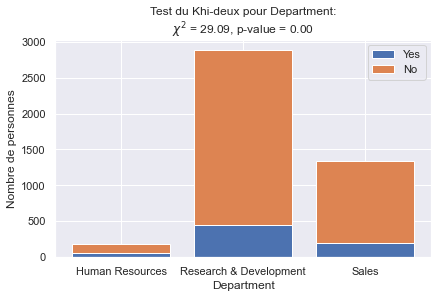

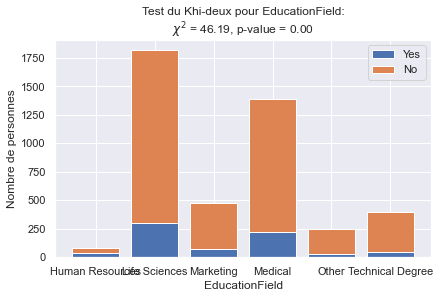

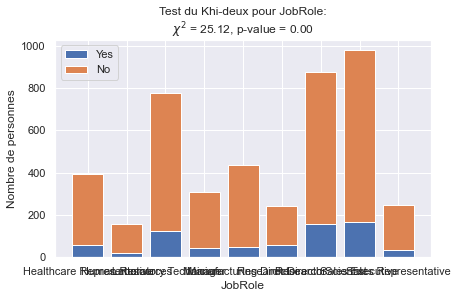

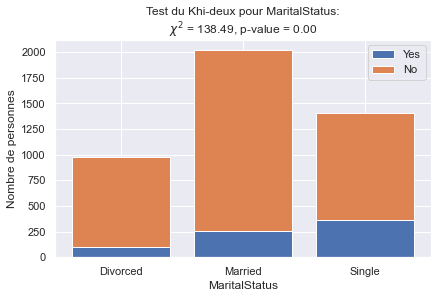

In [214]:
import matplotlib.pyplot as plt

for name_column in data_merged.select_dtypes(include=['object']).columns:
    if (name_column != "Attrition"):
        matrice = pd.crosstab(data_merged['Attrition'], data_merged[name_column])
        chi2, pvalue,dof, expected = stats.chi2_contingency(matrice)
        
        fig, ax = plt.subplots()
        ax.bar(matrice.columns, matrice.loc['Yes'], label='Yes')
        ax.bar(matrice.columns, matrice.loc['No'], bottom=matrice.loc['Yes'], label='No')
        ax.set_xlabel(name_column)
        ax.set_ylabel('Nombre de personnes')
        ax.legend()
        ax.set_title(f'Test du Khi-deux pour {name_column}:\n$\chi^2$ = {chi2:.2f}, p-value = {pvalue:.2f}')
        plt.show()


### Etape 3 - Prétraitement des données

Maintenant que nous avons effectué l'étape d'exploration et d'analyse de données, nous passons à la phase de préparation et de nettoyage des données. 

Cette étape est très importante car elle permet de garantir que les données sont fiables et cohérentes pour la modélisation. Pendant cette étape, nous devons nettoyer les données en supprimant les valeurs manquantes et en effectuant des transformations de données nécessaires.  

La qualité des données est cruciale pour la modélisation et l'analyse prédictive. Des données de qualité garantissent des résultats plus précis et fiables et une meilleure interprétation des résultats. 

Par conséquent, la préparation et le nettoyage des données sont des étapes essentielles dans tout projet d'analyse de données et de modélisation.

In [215]:
ordered_categories = ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']                         # the order of the categories
ordinal_encoder = OrdinalEncoder(categories=[ordered_categories])                                   # instantiate the encoder with our ordered categories
data_merged['BusinessTravel'] = ordinal_encoder.fit_transform(data_merged.loc[:,['BusinessTravel']])     # apply the encoder only on the column 'BusinessTravel'
data_merged.value_counts('BusinessTravel')

BusinessTravel
1.0    3129
2.0     831
0.0     450
dtype: int64

In [216]:
from sklearn.preprocessing import OneHotEncoder

one_hot_columns = ['Department', 'EducationField', 'MaritalStatus', 'JobRole']           # the columns to be one-hot encoded
one_hot_encoder = OneHotEncoder(sparse=False)
for col in one_hot_columns:
    data_merged[col] = one_hot_encoder.fit_transform(data_merged.loc[:,[col]])           # apply one-hot encoding on each column

In [101]:
data_merged.head(1)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,WorkingTime
0,3.0,4.0,2.0,51,No,1.0,0.0,6,2,0.0,...,11,0,1.0,6,1,0,0,3,3,7.373651


In [102]:
data_merged['Attrition'].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

Nous allons convertir la colonne "Attrition" du DataFrame "data_merged" en une série de 0 et 1. 

La fonction "map" est utilisée pour appliquer une fonction lambda qui vérifie si la valeur dans la colonne "Attrition" est "Yes" ou non. Si c'est le cas, la valeur est remplacée par 1, sinon elle est remplacée par 0

In [217]:
data_merged['Attrition'] = data_merged['Attrition'].map(lambda x: 1 if x == "Yes" else 0)
data_merged.value_counts('Attrition')

Attrition
0    3699
1     711
dtype: int64

In [218]:
from sklearn.impute import KNNImputer

#instanciation et définition du k
knn = data_merged[['NumCompaniesWorked', 'TotalWorkingYears', 'EnvironmentSatisfaction',
       'JobSatisfaction', 'WorkLifeBalance']]

imputer = KNNImputer(n_neighbors=5)
imputer.fit_transform(knn)

complete_rows = pd.DataFrame(imputer.fit_transform(knn), columns=knn.columns.values)

data_merged.update(complete_rows)
data_merged.head(5)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
0,3.0,4.0,2.0,51,0,1.0,0.0,6,2,0.0,...,1.0,11,0,1.0,6,1,0,0,3,3
1,3.0,2.0,4.0,31,1,2.0,0.0,10,1,0.0,...,0.0,23,1,6.0,3,5,1,4,2,4
2,2.0,2.0,1.0,32,0,2.0,0.0,17,4,0.0,...,1.0,15,3,5.0,2,5,0,3,3,3
3,4.0,4.0,3.0,38,0,0.0,0.0,2,5,0.0,...,3.0,11,3,13.0,5,8,7,5,2,3
4,4.0,1.0,3.0,32,0,1.0,0.0,10,1,0.0,...,4.0,12,2,9.0,2,6,0,4,3,3


In [142]:
data_merged.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,WorkingTime
0,3.0,4.0,2.0,51,0,1.0,0.0,6,2,0.0,...,11,0,1.0,6,1,0,0,3,3,7.373651
1,3.0,2.0,4.0,31,1,2.0,0.0,10,1,0.0,...,23,1,6.0,3,5,1,4,2,4,7.718969
2,2.0,2.0,1.0,32,0,2.0,0.0,17,4,0.0,...,15,3,5.0,2,5,0,3,3,3,7.013240
3,4.0,4.0,3.0,38,0,0.0,0.0,2,5,0.0,...,11,3,13.0,5,8,7,5,2,3,7.193678
4,4.0,1.0,3.0,32,0,1.0,0.0,10,1,0.0,...,12,2,9.0,2,6,0,4,3,3,8.006175


In [219]:
data_for_correlation = data_merged.copy()
data_for_correlation = data_for_correlation.drop('Attrition', axis=1, inplace=True)
corrMatrix = data_merged.corr()
corrMatrix

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating
EnvironmentSatisfaction,1.000000,-0.005787,0.025396,0.010346,-0.101627,-0.009806,0.019959,0.020567,-0.043696,0.020866,...,0.015309,0.000396,-0.003665,-0.001810,0.018110,-0.000224,0.015127,-0.006561,0.016471,0.013673
JobSatisfaction,-0.005787,1.000000,-0.018575,-0.003539,-0.103453,0.008258,-0.008816,-0.011548,-0.003851,-0.021498,...,-0.055479,0.031051,0.038758,-0.018288,-0.021991,-0.002648,-0.016843,-0.025459,0.003844,0.043676
WorkLifeBalance,0.025396,-0.018575,1.000000,-0.019441,-0.064182,0.003989,-0.009947,0.006881,-0.005880,0.010210,...,-0.010081,-0.040944,-0.022948,0.001905,-0.014341,0.012725,0.009239,0.004720,-0.018818,-0.022471
Age,0.010346,-0.003539,-0.019441,1.000000,-0.159205,-0.011807,-0.007062,0.006963,-0.035706,-0.047678,...,0.299590,-0.033137,-0.031753,0.679946,-0.027308,0.311309,0.216513,0.202089,0.018196,-0.025563
Attrition,-0.101627,-0.103453,-0.064182,-0.159205,1.000000,0.127006,0.080768,-0.009730,-0.015111,0.091573,...,0.042047,0.032533,-0.006839,-0.169892,-0.049431,-0.134392,-0.033019,-0.156199,-0.015588,0.023403
BusinessTravel,-0.009806,0.008258,0.003989,-0.011807,0.127006,1.000000,-0.002796,0.014130,0.007567,-0.022214,...,-0.030595,-0.025727,0.004770,0.007781,-0.043173,0.005212,0.005222,-0.000229,0.025705,-0.019587
Department,0.019959,-0.008816,-0.009947,-0.007062,0.080768,-0.002796,1.000000,-0.024506,0.014716,0.646436,...,-0.056090,-0.025888,0.011773,-0.031848,-0.029598,-0.045801,-0.033187,-0.051562,0.004789,-0.006385
DistanceFromHome,0.020567,-0.011548,0.006881,0.006963,-0.009730,0.014130,-0.024506,1.000000,-0.008638,0.030508,...,-0.013949,0.038125,0.011169,0.009005,-0.009001,0.031684,0.002290,0.021584,-0.001837,0.036418
Education,-0.043696,-0.003851,-0.005880,-0.035706,-0.015111,0.007567,0.014716,-0.008638,1.000000,-0.018057,...,-0.016188,-0.040531,0.001261,-0.010553,0.010472,0.006080,0.022490,0.005358,-0.018279,-0.035591
EducationField,0.020866,-0.021498,0.010210,-0.047678,0.091573,-0.022214,0.646436,0.030508,-0.018057,1.000000,...,-0.039952,-0.016142,0.003362,-0.048621,-0.025872,-0.049815,-0.042572,-0.065796,-0.019288,-0.016167


In [220]:
print(corrMatrix["Attrition"].sort_values(ascending=False))

Attrition                  1.000000
BusinessTravel             0.127006
EducationField             0.091573
Department                 0.080768
NumCompaniesWorked         0.042047
PercentSalaryHike          0.032533
PerformanceRating          0.023403
StockOptionLevel          -0.006839
DistanceFromHome          -0.009730
JobLevel                  -0.010290
JobRole                   -0.013768
Education                 -0.015111
JobInvolvement            -0.015588
MonthlyIncome             -0.031176
YearsSinceLastPromotion   -0.033019
TrainingTimesLastYear     -0.049431
WorkLifeBalance           -0.064182
MaritalStatus             -0.087716
EnvironmentSatisfaction   -0.101627
JobSatisfaction           -0.103453
YearsAtCompany            -0.134392
YearsWithCurrManager      -0.156199
Age                       -0.159205
TotalWorkingYears         -0.169892
Name: Attrition, dtype: float64


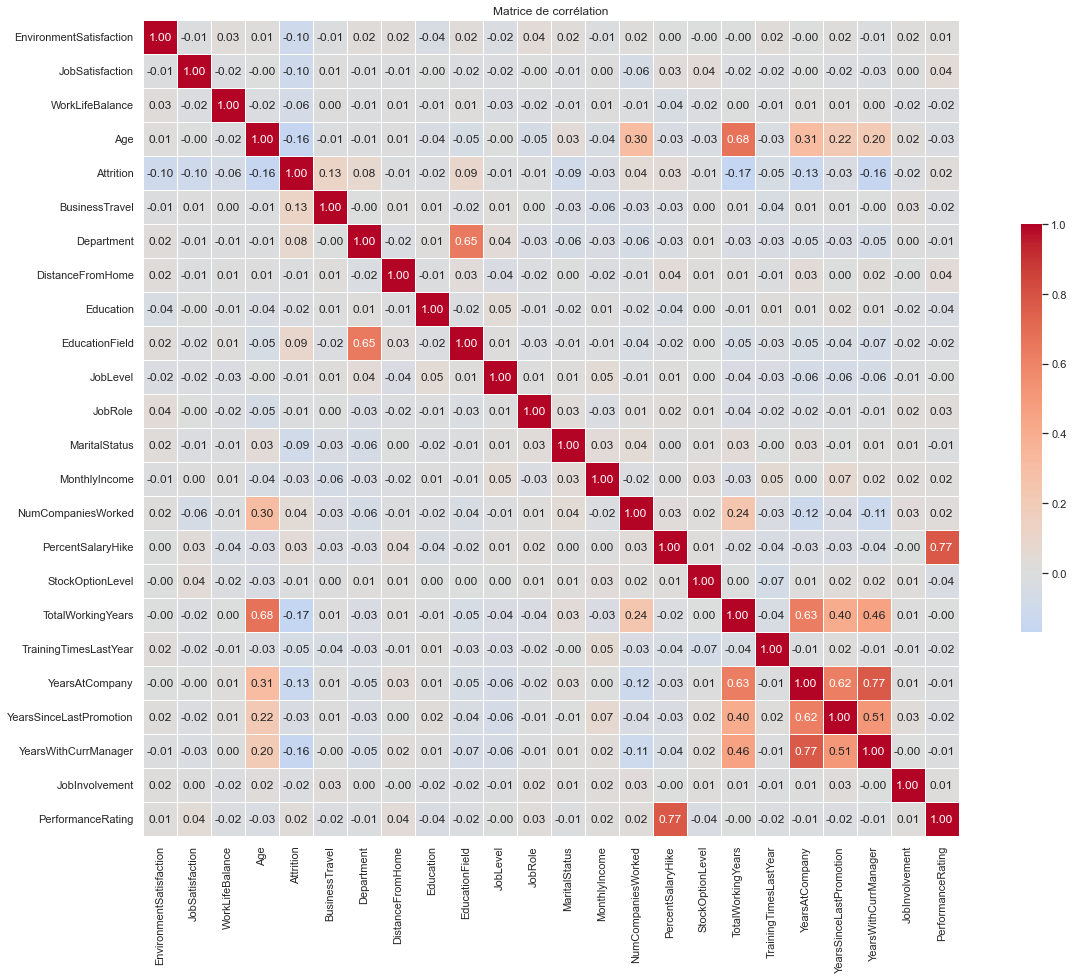

In [221]:
import seaborn as sns
# Calculer et afficher la matrice de corrélation des features
corr_matrix = data_merged.corr()
fig, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix,annot=True,linewidths=0.5,fmt=".2f",cmap="coolwarm", center=0, square=True, cbar_kws={"shrink": .5},ax=ax)
ax.set_title("Matrice de corrélation")
bottom, top = ax.get_ylim()


In [146]:
data_merged.head(2)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,WorkingTime
0,3.0,4.0,2.0,51,0,1.0,0.0,6,2,0.0,...,11,0,1.0,6,1,0,0,3,3,7.373651
1,3.0,2.0,4.0,31,1,2.0,0.0,10,1,0.0,...,23,1,6.0,3,5,1,4,2,4,7.718969


In [147]:
data_merged.head()

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,WorkingTime
0,3.0,4.0,2.0,51,0,1.0,0.0,6,2,0.0,...,11,0,1.0,6,1,0,0,3,3,7.373651
1,3.0,2.0,4.0,31,1,2.0,0.0,10,1,0.0,...,23,1,6.0,3,5,1,4,2,4,7.718969
2,2.0,2.0,1.0,32,0,2.0,0.0,17,4,0.0,...,15,3,5.0,2,5,0,3,3,3,7.013240
3,4.0,4.0,3.0,38,0,0.0,0.0,2,5,0.0,...,11,3,13.0,5,8,7,5,2,3,7.193678
4,4.0,1.0,3.0,32,0,1.0,0.0,10,1,0.0,...,12,2,9.0,2,6,0,4,3,3,8.006175


### Etape 4 - Séparation des données

In [222]:
from sklearn.model_selection import StratifiedShuffleSplit

# Diviser les données en train et test
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(data_merged, data_merged['Attrition']):
    train_set = data_merged.loc[train_index]
    test_set =  data_merged.loc[test_index]
    

In [223]:
data_train_X = train_set.drop("Attrition", axis=1)       # Train DataFrame without Attrition
data_train_labels = train_set["Attrition"].copy()        # Our lables (Y= Attrition)

data_test_X  = test_set.drop("Attrition", axis=1)      # Train DataFrame without Attrition
data_test_labels = test_set["Attrition"].copy()        # Our lables (Y= Attrition)

In [114]:
data_train_X.shape   # On voit bien que le split a bien été effécué, data_train_X represente du dataframe 80%

(3528, 24)

In [115]:
data_test_X.shape   # On voit bien que le split a bien été effécué, data_test_X represente du dataframe 20%

(882, 24)

In [116]:
data_train_X.info()   # Analysons un peu nos data d'entrainement 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3528 entries, 1514 to 209
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EnvironmentSatisfaction  3528 non-null   float64
 1   JobSatisfaction          3528 non-null   float64
 2   WorkLifeBalance          3528 non-null   float64
 3   Age                      3528 non-null   int64  
 4   BusinessTravel           3528 non-null   float64
 5   Department               3528 non-null   float64
 6   DistanceFromHome         3528 non-null   int64  
 7   Education                3528 non-null   int64  
 8   EducationField           3528 non-null   float64
 9   JobLevel                 3528 non-null   int64  
 10  JobRole                  3528 non-null   float64
 11  MaritalStatus            3528 non-null   float64
 12  MonthlyIncome            3528 non-null   int64  
 13  NumCompaniesWorked       3528 non-null   float64
 14  PercentSalaryHike     

In [117]:
data_test_X.head(6)

,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,WorkingTime
1428,3.0,1.0,2.0,30,2.0,0.0,3,2,0.0,2,...,14,0,9.0,2,6,0,1,2,3,7.008028
1167,2.0,4.0,3.0,33,1.0,0.0,3,4,0.0,3,...,14,0,10.0,2,9,8,1,2,3,9.103675
1218,3.0,1.0,2.0,59,1.0,0.0,2,2,0.0,5,...,12,1,12.0,3,1,0,0,3,3,10.035186
1715,2.0,4.0,2.0,34,1.0,0.0,1,5,0.0,1,...,12,0,10.0,0,10,8,8,3,3,7.402896
2896,4.0,1.0,3.0,30,1.0,0.0,10,4,0.0,2,...,13,0,8.0,3,5,0,4,2,3,8.483143
4363,3.0,3.0,3.0,30,0.0,0.0,17,4,0.0,2,...,12,1,12.0,2,11,5,8,2,3,7.963074


Dans un premier temps, on utilise la regression logistique sans paramtere pour observer 

In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_predict

log_clf = LogisticRegression()                        # Dans un premier temps, on utilise la regression logistique sans paramtere pour observer 
log_clf.fit(data_train_X, data_train_labels)


LogisticRegression()

#### Affichage des Coefficient

In [225]:
print(log_clf.intercept_)
print(log_clf.coef_)

[0.00059314]
[[-2.72613642e-02 -2.98751009e-02 -1.02165335e-02 -2.12997770e-02
   1.85778304e-02  3.85395931e-03 -1.83668243e-02  9.67435114e-04
   2.99186175e-03 -6.32505233e-03 -1.15599877e-03 -8.71696014e-03
  -1.40364872e-06  4.84860843e-02  2.00554668e-02 -4.17959305e-03
  -4.40628095e-02 -1.66316581e-02 -5.33993871e-02  3.09727694e-02
  -5.65396565e-02  1.53794846e-03  2.55509387e-03]]


In [226]:
pd.DataFrame(np.concatenate([log_clf.intercept_.reshape(-1,1),
                             log_clf.coef_],axis=1),
             index = ["coef"],
             columns = ["constante"]+list(data_train_X.columns)).T

,coef
constante,0.000593
EnvironmentSatisfaction,-0.027261
JobSatisfaction,-0.029875
WorkLifeBalance,-0.010217
Age,-0.021300
BusinessTravel,0.018578
Department,0.003854
DistanceFromHome,-0.018367
Education,0.000967
EducationField,0.002992


In [227]:
import statsmodels.api as sm

x_stat = sm.add_constant(data_train_X)
model_logit = sm.Logit(data_train_labels, x_stat)
result = model_logit.fit()

Optimization terminated successfully.
         Current function value: 0.375825
         Iterations 7


In [45]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              Attrition   No. Observations:                 3528
Model:                          Logit   Df Residuals:                     3502
Method:                           MLE   Df Model:                           25
Date:                Thu, 16 Mar 2023   Pseudo R-squ.:                  0.2010
Time:                        09:33:22   Log-Likelihood:                -1245.4
converged:                       True   LL-Null:                       -1558.6
Covariance Type:            nonrobust   LLR p-value:                3.512e-116
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.4452      0.743     -0.599      0.549      -1.901       1.010
EmployeeID               2.447e-05   4.04e-05      0.605      0.545   -5.48e-05       0.000
EnvironmentSatisfaction    -0.3388      0.047     -7.164      0.000      -0.431      -0.246
JobSatisfaction            -0.3669      0.047     -7.819      0.000      -0.459      -0.275
WorkLifeBalance            -0.3177      0.071     -4.451      0.000      -0.458      -0.178
Age                        -0.0448      0.008     -5.339      0.000      -0.061      -0.028
BusinessTravel              0.7720      0.100      7.740      0.000       0.576       0.967
Department                  0.4670      0.311      1.501      0.133      -0.143       1.077
DistanceFromHome           -0.0042      0.006     -0.653      0.514      -0.017       0.008
Education                  -0.0159      0.050     -0.314      0.753      -0.115       0.083
EducationField              0.6815      0.409      1.665      0.096      -0.121       1.484
JobLevel                   -0.0936      0.048     -1.953      0.051      -0.188       0.000
JobRole                    -0.1479      0.183     -0.809      0.419      -0.506       0.210
MaritalStatus              -0.6422      0.142     -4.536      0.000      -0.920      -0.365
MonthlyIncome           -7.581e-07    1.1e-06     -0.690      0.490   -2.91e-06     1.4e-06
NumCompaniesWorked          0.1334      0.022      6.041      0.000       0.090       0.177
PercentSalaryHike           0.0090      0.022      0.409      0.682      -0.034       0.052
StockOptionLevel           -0.0438      0.061     -0.715      0.474      -0.164       0.076
TotalWorkingYears          -0.0614      0.014     -4.331      0.000      -0.089      -0.034
TrainingTimesLastYear      -0.1364      0.041     -3.320      0.001      -0.217      -0.056
YearsAtCompany             -0.0040      0.022     -0.179      0.858      -0.048       0.040
YearsSinceLastPromotion     0.1439      0.025      5.853      0.000       0.096       0.192
YearsWithCurrManager       -0.1398      0.028     -5.066      0.000      -0.194      -0.086
JobInvolvement             -0.0255      0.072     -0.352      0.725      -0.167       0.116
PerformanceRating          -0.1019      0.222     -0.459      0.646      -0.537       0.333
WorkingTime                 0.4589      0.037     12.494      0.000       0.387       0.531
===========================================================================================
"""

In [228]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

log_clf = LogisticRegression(random_state=42)

param_grid = [
    {
        'penalty': ['none', 'l1', 'l2','elasticnet'],
        'fit_intercept': [True, False],
        'max_iter': [20,50,100,300],
        'warm_start': [True, False],
    }
  ]

grid_search = GridSearchCV(log_clf, param_grid, cv=5)
grid_search.fit(data_train_X, data_train_labels)
grid_search.best_params_

{'fit_intercept': True, 'max_iter': 20, 'penalty': 'none', 'warm_start': True}

In [229]:
print("Les meilleurs Hyper-parametres dans notre cas sont : \n\n ", grid_search.best_params_)
best_logistic_reg = grid_search.best_estimator_
print(best_logistic_reg)

Les meilleurs Hyper-parametres dans notre cas sont : 

  {'fit_intercept': True, 'max_iter': 20, 'penalty': 'none', 'warm_start': True}
LogisticRegression(max_iter=20, penalty='none', random_state=42,
                   warm_start=True)


In [230]:
from sklearn.feature_selection import RFECV

logistic_reg  = best_logistic_reg

sel = RFECV(estimator=logistic_reg, cv = 10, scoring="accuracy")   # RFECV nous aide à sélectionner un sous-ensemble optimal de features (caracteristiques) 
sel.fit(data_train_X, data_train_labels)

train_logistic_X = data_train_X[data_train_X.columns[sel.support_]]
test_logistic_X = data_test_X[data_test_X.columns[sel.support_]]


In [231]:
from sklearn.model_selection import cross_val_score
cross_val_score(sel, train_logistic_X, data_train_labels, cv=3, scoring="accuracy")   # tester les performances de notre modele 

array([0.83843537, 0.84438776, 0.85034014])

In [232]:
import numpy
logistic_predict = sel.estimator_.predict(test_logistic_X)

In [233]:
accuracy = sel.score(data_test_X, data_test_labels)
print("Accuracy:", accuracy)

Accuracy: 0.8401360544217688


In [235]:
from sklearn.metrics import confusion_matrix
confusion_matrix(data_test_labels, logistic_predict)

array([[732,   8],
       [133,   9]], dtype=int64)

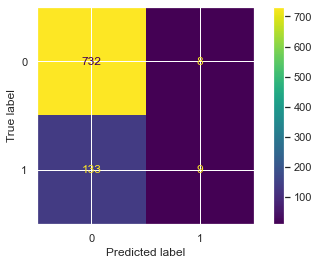

In [236]:
from sklearn import metrics

metrics.plot_confusion_matrix(sel.estimator_, test_logistic_X, data_test_labels)  
plt.show()

In [240]:
from sklearn import metrics
print(metrics.classification_report(data_test_labels, logistic_predict))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       740
           1       0.53      0.06      0.11       142

    accuracy                           0.84       882
   macro avg       0.69      0.53      0.51       882
weighted avg       0.80      0.84      0.78       882



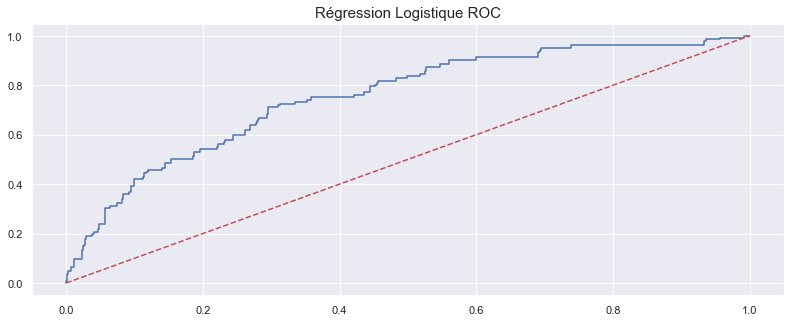

In [241]:
plt.figure(figsize=(12,5))

probaLr = sel.estimator_.predict_proba(test_logistic_X)
lr_pred = probaLr[:,1]
fpr_lr, tpr_lr, threshold_lr = metrics.roc_curve(data_test_labels, lr_pred, pos_label=sel.estimator_.classes_[1])
roc_auc_lr = metrics.auc(fpr_lr, tpr_lr)

plt.plot(fpr_lr, tpr_lr, 'b', label = 'AUC = %0.2f' % roc_auc_lr)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Régression Logistique ROC', fontsize=15)
plt.show()

### RandomForrest

In [242]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

X_train_forest = data_train_X.copy()
y_train_forest = data_train_labels.copy()
X_test_forest = data_test_X.copy()
y_test_forest = data_test_labels.copy()
forest_clf = RandomForestClassifier()

forest_param_grid = [
    {
    'n_estimators' : [50, 100, 200],
    'max_depth' : [10, 20, 40, 50,60]}
  ]

grid_search = GridSearchCV(forest_clf, forest_param_grid, cv=7,
                           scoring='f1', return_train_score=True)
grid_search.fit(X_train_forest, y_train_forest)


GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 20, 40, 50, 60],
                          'n_estimators': [50, 100, 200]}],
             return_train_score=True, scoring='f1')

In [243]:
print(grid_search.best_params_)
best_random_forest = grid_search.best_estimator_
print(best_random_forest)

{'max_depth': 40, 'n_estimators': 200}
RandomForestClassifier(max_depth=40, n_estimators=200)


In [244]:
forest_clf = best_random_forest
forest_clf.fit(X_train_forest,y_train_forest)

forest_pred=forest_clf.predict(X_test_forest)

In [245]:
print(grid_search.best_params_)
best_random_forest = grid_search.best_estimator_
print(best_random_forest)

{'max_depth': 40, 'n_estimators': 200}
RandomForestClassifier(max_depth=40, n_estimators=200)


In [246]:
forest_clf = best_random_forest
forest_clf.fit(X_train_forest,y_train_forest)
forest_pred=forest_clf.predict(X_test_forest)

In [247]:
confusion_matrix(y_test_forest, forest_pred)

array([[740,   0],
       [  3, 139]], dtype=int64)

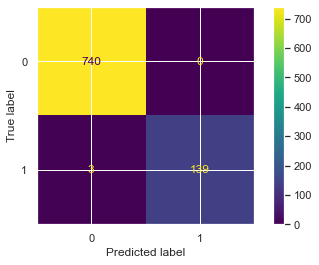

In [248]:
from sklearn import metrics

metrics.plot_confusion_matrix(forest_clf, X_test_forest, data_test_labels)  
plt.show()

In [249]:
print(metrics.classification_report(y_test_forest, forest_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       740
           1       1.00      0.98      0.99       142

    accuracy                           1.00       882
   macro avg       1.00      0.99      0.99       882
weighted avg       1.00      1.00      1.00       882



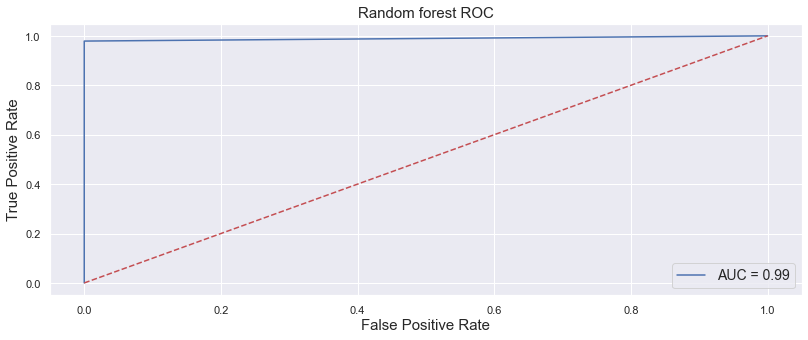

In [250]:
plt.figure(figsize=(12,5))

fpr_rdm_forest, tpr_rdm_forest, threshold_rdm_forest = metrics.roc_curve(y_test_forest, forest_pred)
roc_auc_rdm_forest = metrics.auc(fpr_rdm_forest, tpr_rdm_forest)

plt.plot(fpr_rdm_forest, tpr_rdm_forest, 'b', label = 'AUC = %0.2f' % roc_auc_rdm_forest)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Random forest ROC', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

plt.show()

### Arbre de decision 

In [195]:
from sklearn.tree import DecisionTreeClassifier
X_train_tree = data_train_X.copy()
y_train_tree = data_train_labels.copy()
X_test_tree = data_test_X.copy()
y_test_tree = data_test_labels.copy()
tree = DecisionTreeClassifier()
tree_param_grid = [{'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}]

grid_search = GridSearchCV(tree, tree_param_grid, cv=7,
                           scoring='f1', return_train_score=True)
grid_search.fit(X_train_tree, y_train_tree)

GridSearchCV(cv=7, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                             13, 14, 15, 16, 17, 18, 19, 20, 21,
                                             22, 23, 24, 25, 26, 27, 28, 29, 30,
                                             31, ...],
                          'min_samples_split': [2, 3, 4]}],
             return_train_score=True, scoring='f1')

In [177]:
print(grid_search.best_params_)
best_decision_tree = grid_search.best_estimator_
print(best_decision_tree)

{'max_leaf_nodes': 99, 'min_samples_split': 3}
DecisionTreeClassifier(max_leaf_nodes=99, min_samples_split=3)


In [178]:
tree = best_decision_tree
tree = tree.fit(X_train_tree, y_train_tree)
tree.score(X_train_tree, y_train_tree)

0.9589002267573696

In [80]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="arbre.dot", filled=True, feature_names= X_train_tree.columns)


In [59]:
conda install python-graphviz


Note: you may need to restart the kernel to use updated packages.


In [60]:
!dot -Tpng arbre.dot -o arbre.png

'dot' n'est pas reconnu en tant que commande interne
ou externe, un programme ex‚cutable ou un fichier de commandes.


In [62]:
#from IPython.core.display import Image
#Image("arbre.png")

In [62]:
tree_pred = tree.predict(X_test_tree)

In [179]:
from sklearn.model_selection import cross_val_score
cross_val_score(tree, X_train_tree, y_train_tree, cv=3, scoring="accuracy")

array([0.92857143, 0.90561224, 0.91581633])

In [180]:
confusion_matrix(y_test_tree, tree_pred)

array([[718,  22],
       [ 58,  84]], dtype=int64)

In [181]:
print(metrics.classification_report(y_test_tree, tree_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       740
           1       0.79      0.59      0.68       142

    accuracy                           0.91       882
   macro avg       0.86      0.78      0.81       882
weighted avg       0.90      0.91      0.90       882



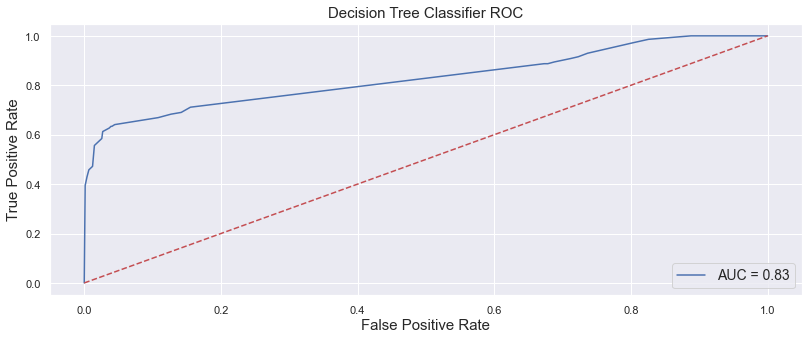

In [182]:
plt.figure(figsize=(12,5))

probaTree = tree.predict_proba(X_test_tree)
tree_test_pred = probaTree[:,1]
fpr_tree, tpr_tree, threshold_tree = metrics.roc_curve(y_test_tree, tree_test_pred, pos_label=tree.classes_[1])
roc_auc_tree = metrics.auc(fpr_tree, tpr_tree)

plt.plot(fpr_tree, tpr_tree, 'b', label = 'AUC = %0.2f' % roc_auc_tree)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Decision Tree Classifier ROC', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

plt.show()


## SVC 

In [ ]:

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Définir les hyperparamètres à tester avec Grid Search
parameters = {'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              'C': [0.1, 1, 10],
              'gamma': ['scale', 'auto']}

# Créer le classifieur SVM
svc = SVC()

# Utiliser Grid Search pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(svc, parameters, cv=5, scoring='accuracy')
grid_search.fit(data_train_X, data_train_labels)

# Afficher les meilleurs hyperparamètres trouvés
print("Meilleurs hyperparamètres trouvés : ", grid_search.best_params_)

# Utiliser le modèle avec les meilleurs hyperparamètres pour faire des prédictions sur le jeu de test
y_pred = grid_search.predict(data_test_X)

# Calculer l'accuracy du modèle
accuracy = accuracy_score(data_test_labels, y_pred)
print("Accuracy : ", accuracy)


In [ ]:
print(grid_search.best_params_)
best_svc = grid_search.best_estimator_
print(best_svc)

In [ ]:
sv = best_svc
sv.fit(data_train_X, data_train_labels)

In [ ]:
svc_pred = sv.predict(data_test_X)
cross_val_score(svc, X_train_svc, data_train_labels, cv=3, scoring="accuracy")

<h1 style="color:#4476d3">Classements de tous les algorithmes</h1>

Après avoir testé nos différents modèles, nous allons maintenant les comparer en fonction de leurs performances pour déterminer lequel est le plus performant.


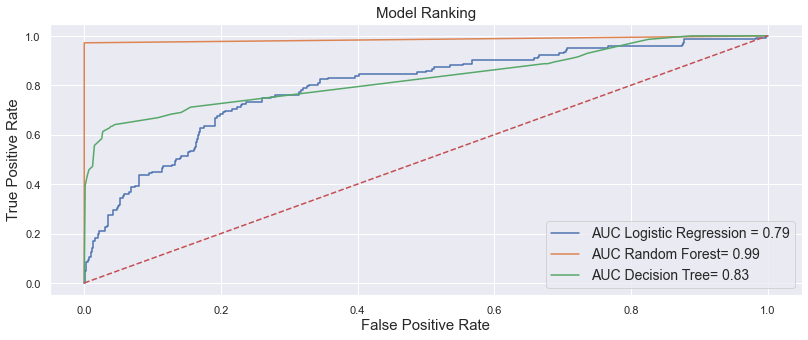

In [183]:
plt.figure(figsize=(12,5))
plt.plot(fpr_lr, tpr_lr, label = 'AUC Logistic Regression = %0.2f' % roc_auc_lr)
plt.plot(fpr_rdm_forest, tpr_rdm_forest, label = 'AUC Random Forest= %0.2f' % roc_auc_rdm_forest)
plt.plot(fpr_tree, tpr_tree, label = 'AUC Decision Tree= %0.2f' % roc_auc_tree)
plt.plot([0, 1], [0, 1],'r--')
plt.title('Model Ranking', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.xlabel('False Positive Rate', fontsize=15)
plt.legend(loc = 'lower right', prop={'size': 14})

plt.show()

| Algorithmes | Valeur AUC | False Negatif | False Positif |
| ------- | --- | --- | --- |
|   1. Random Forest   | <span style="color:#33FF3B">0.97</span> | <span style="color:#33FF3B">10</span> | <span style="color:#33FF3B">0</span>     
|   2. Arbre de décision  | 0.83 | 58 | 22 |
|  3. Régression Logistique  | 0.79 | 133 | 8 |

Au vu des résultats de performance, nous choisissons l'algorithme <font color="green"><strong>Random Forest.</strong></font>

In [184]:
forest_clf.fit(data_train_X,data_train_labels)

RandomForestClassifier(max_depth=50, n_estimators=200)

Le code ci-dessous sert à visualiser les importances relatives des différentes caractéristiques (features) utilisées dans un modèle de classification utilisant l'algorithme de forêt aléatoire 

Text(0.5, 0, 'Relative Importance')

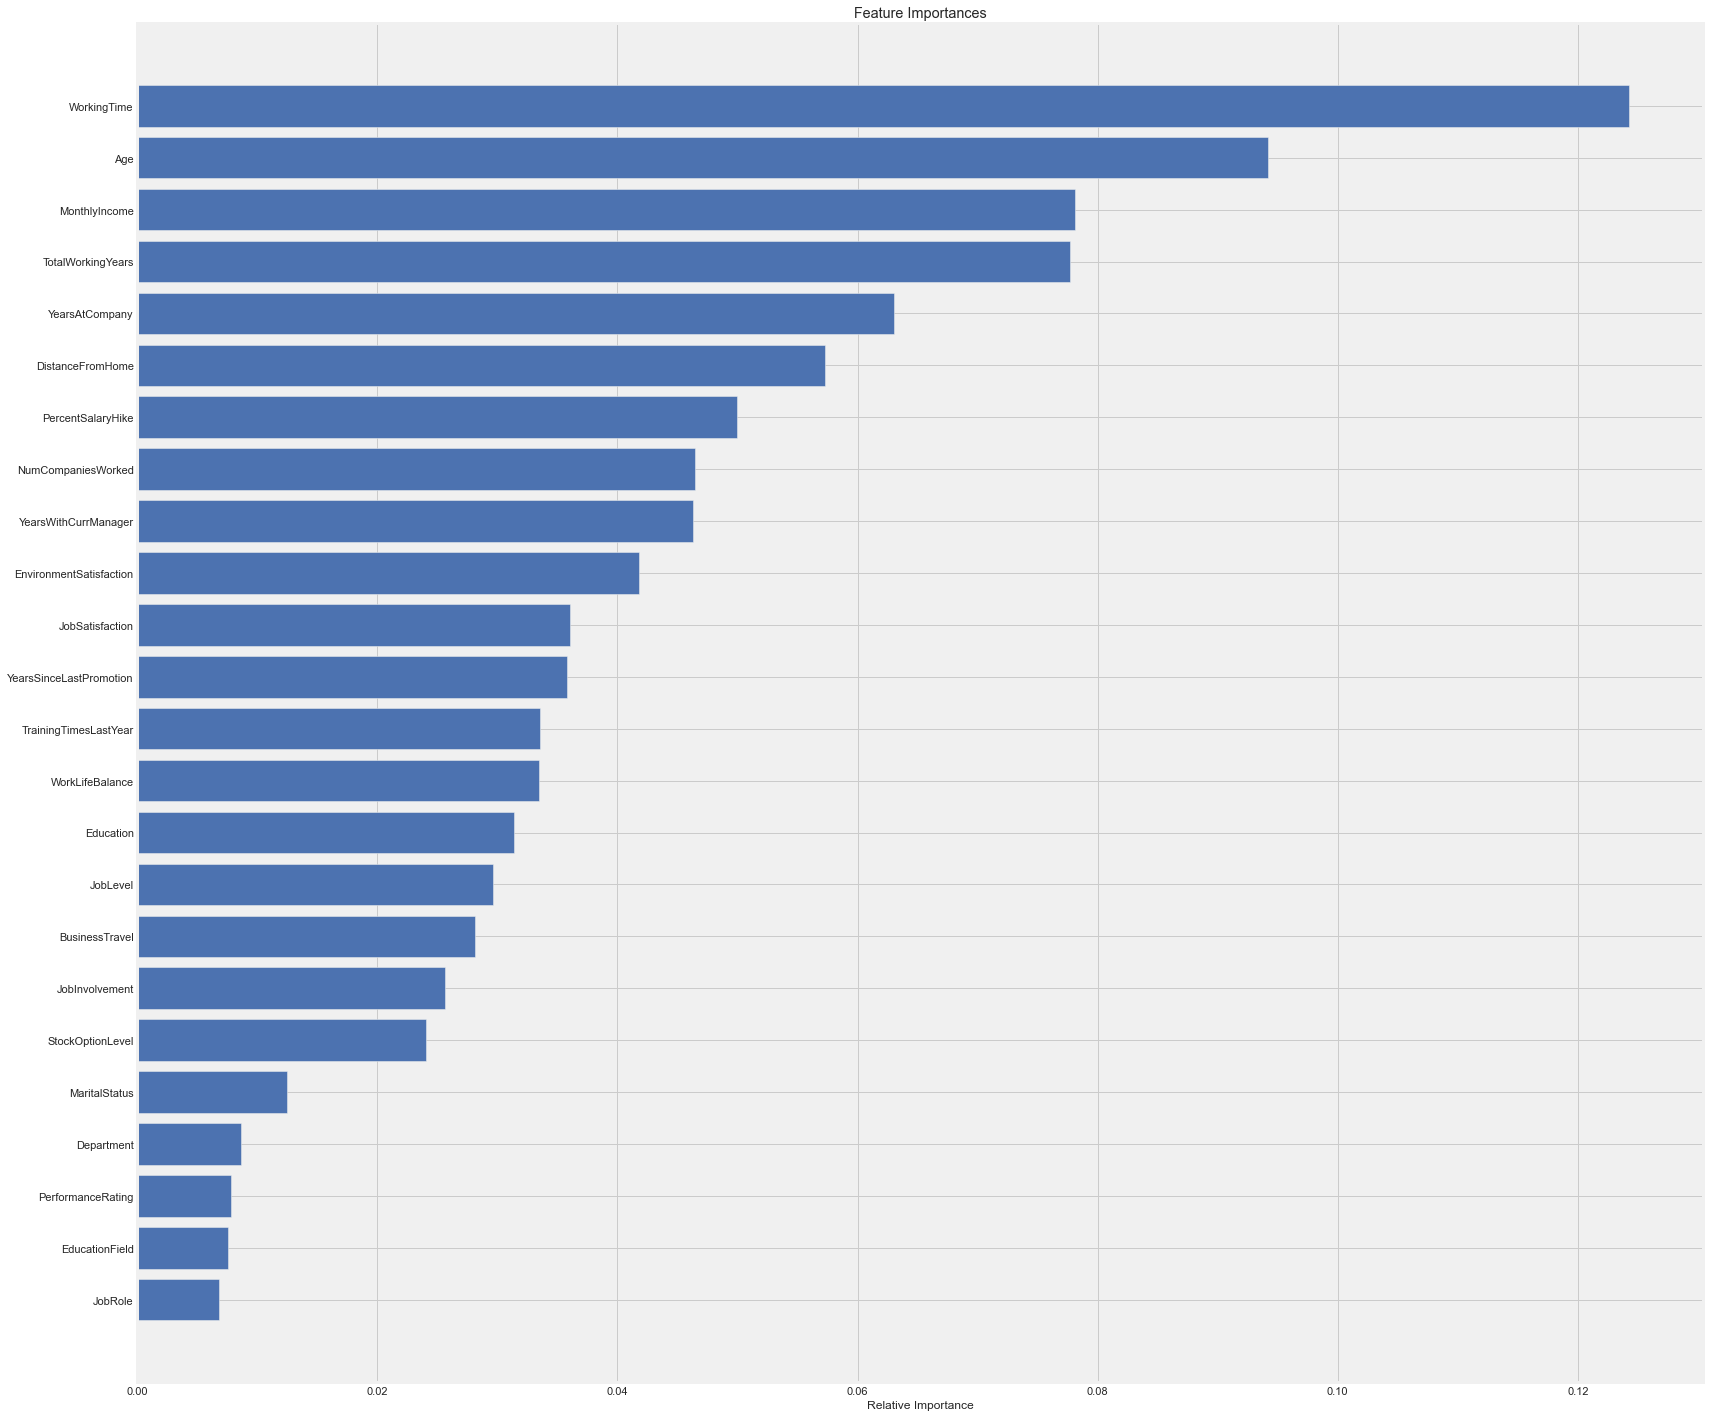

In [185]:
importances = forest_clf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(figsize=(25,25))

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [data_train_X.columns[i] for i in indices])
plt.xlabel('Relative Importance')

Ce graphique nous permet de comprendre quelles variables sont importantes pour décider si un employé va quitter l'entreprise ou non. Pour déterminer les variables les plus significatives, nous avons fixé un seuil et considéré que les variables ayant une importance supérieure à ce seuil sont pertinentes. Nous avons ainsi retenu toutes les variables jusqu'à TrainingTimesLastYear, considérant que les autres n'ont pas une importance suffisante. Cependant, disposer de cette liste de variables ne nous permet pas encore de comprendre qui est le plus susceptible de partir.

### Analyse variables

#### 1- Age

On peut remarquer une légère difference entre les salariers partient de l'entreprise en fonction de leurs ages. En effet d'après la boite moustache une personne plus jeune à plus de chance de partir. On peut tirer cette conclusion car la mediane des salariers parti est en dessous de celle des salarier rester ainsi que pour le quartiel inferieur et supérieur.

Text(0.5, 0.98, '')

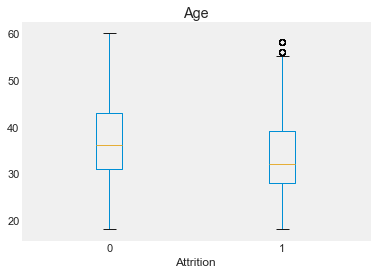

In [70]:
data_merged.boxplot(by ='Attrition', column = "Age", grid = False, figsize=None) 
plt.suptitle("")

#### 2- TotalWorkingYears

Concernant l'histogramme du nombre d'année dans l'entreprise, on constate les salariers plus suseptible de partir sont se qui ont passé le moins de temps dans l'entreprise.

Text(0.5, 0.98, '')

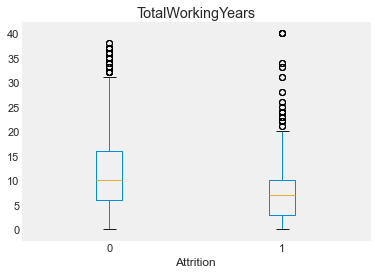

In [74]:
data_merged.boxplot(by ='Attrition', column = "TotalWorkingYears", grid = False, figsize=None) 
plt.suptitle("")


#### 3- MonthlyIcome

Text(0.5, 0.98, '')

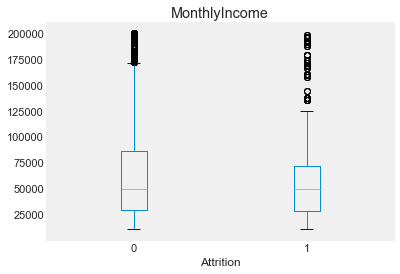

In [72]:
data_merged.boxplot(by ='Attrition', column = "MonthlyIncome", grid = False, figsize=None) 
plt.suptitle("")

Text(0.5, 0.98, '')

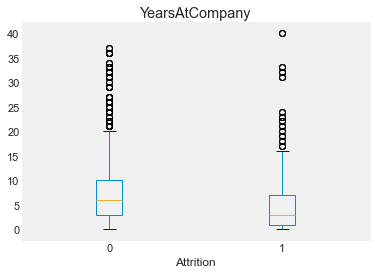

In [75]:
data_merged.boxplot(by ='Attrition', column = "YearsAtCompany", grid = False, figsize=None) 
plt.suptitle("")

<h1 style="color:#4476d3">Propositions </h1>

En premier lieu, il semble que les jeunes employés quittent l'entreprise pour des raisons financières, notamment pour des offres d'emploi proposant un meilleur salaire. Pour remédier à cette situation, nous pourrions proposer une augmentation de salaire ou des primes pour retenir les employés.

En outre, les employés qui quittent leur poste ont travaillé peu de temps avec leur manager actuel. Cette tendance soulève un problème potentiel qui mérite une enquête interne. Cette enquête pourrait révéler un problème avec un manager particulier, qui serait à l'origine du taux de roulement.

Enfin, il est important de noter que deux variables, la satisfaction au travail et la satisfaction de l'environnement, ont des notes inférieures, ce qui peut être lié à la performance du manager. Pour améliorer cette situation, il serait souhaitable d'effectuer une enquête approfondie pour recueillir les commentaires des employés, sans la participation des managers, afin de mieux comprendre les problèmes sous-jacents et d'y remédier de manière plus efficace.